<a href="https://colab.research.google.com/github/jaymalak/Capstone1/blob/master/Capstone_Project_I__v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installation / Import of packages








In [439]:
!pip install mysql.connector

Processing /root/.cache/pip/wheels/8c/83/a1/f8b6d4bb1bd6208bbde1608bbfa7557504bed9eaf2ecf8c175/mysql_connector-2.2.9-cp36-cp36m-linux_x86_64.whl


In [440]:
!pip install gmplot

In [0]:
import gmplot

In [0]:
import folium

In [0]:
from folium.plugins import HeatMap

In [444]:
!pip install plotly

In [445]:
!pip install googletrans

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

In [0]:
import pandas as pd
import numpy as np
import plotly
import seaborn as sns
import plotly.express as px

In [448]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=False)

In [0]:
pd.set_option('float_format', '{:3f}'.format)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

##Data Fetched for MYSQL and CSV

In [0]:
from mysql.connector import Error

In [0]:
import mysql.connector

In [712]:
try:
   connection = mysql.connector.connect(host='cpanel.insaid.co', database='Capstone1', user='student',password='student')

   if connection.is_connected():
     db_info = connection.get_server_info()
     print("connected to MySQ Server version", db_info)
     sql_gender_age = "select * from gender_age_train"
     sql_ph_brand = "select * from phone_brand_device_model"
    
     cursor = connection.cursor()
     cursor.execute(sql_gender_age)
     record = cursor.fetchall()
     gender_age_train = pd.DataFrame(record)
     
     cursor.execute(sql_ph_brand)
     record1 = cursor.fetchall()
     phone_brand = pd.DataFrame(record1)

 
except Error as e :
  print ("Error while connecting  to MySQL", e)

finally :
  if (connection.is_connected()) :
    cursor.close()
    connection.close()
    print("MySQL connection is closed")

connected to MySQ Server version 5.6.47-cll-lve
MySQL connection is closed


In [713]:
connection

In [714]:
gender_age_train.head()

0  1   2       3
0 -8076087639492063270  M  35  M32-38
1 -2897161552818060146  M  35  M32-38
2 -8260683887967679142  M  35  M32-38
3 -4938849341048082022  M  30  M29-31
4   245133531816851882  M  30  M29-31

In [715]:
phone_brand.head()

0     1        2
0  1877775838486905855  vivo      Y13
1 -3766087376657242966    小米     V183
2 -6238937574958215831  OPPO      R7s
3  8973197758510677470    三星    A368t
4 -2015528097870762664    小米  红米Note2

In [716]:
gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
0    74645 non-null int64
1    74645 non-null object
2    74645 non-null int64
3    74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [717]:
phone_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
0    87726 non-null int64
1    87726 non-null object
2    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [718]:
gender_age_train.shape

(74645, 4)

In [719]:
phone_brand.shape

(87726, 3)

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [722]:
link = 'https://drive.google.com/open?id=1ggM3ZXElSob6ZSzWaiNNT3SgiNDHGv6d' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ggM3ZXElSob6ZSzWaiNNT3SgiNDHGv6d


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('events.csv')  
events = pd.read_csv('events.csv')

In [724]:
events.head()

event_id                device_id  ...   city  state
0     1.000000 29182687948017176.000000  ...  Delhi  Delhi
1  7104.000000 29182687948017176.000000  ...  Delhi  Delhi
2 29661.000000 29182687948017176.000000  ...  Delhi  Delhi
3 33133.000000 29182687948017176.000000  ...  Delhi  Delhi
4 38980.000000 29182687948017176.000000  ...  Delhi  Delhi

[5 rows x 7 columns]

In [725]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     float64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(4), object(3)
memory usage: 173.7+ MB


In [726]:
events.head()

event_id                device_id  ...   city  state
0     1.000000 29182687948017176.000000  ...  Delhi  Delhi
1  7104.000000 29182687948017176.000000  ...  Delhi  Delhi
2 29661.000000 29182687948017176.000000  ...  Delhi  Delhi
3 33133.000000 29182687948017176.000000  ...  Delhi  Delhi
4 38980.000000 29182687948017176.000000  ...  Delhi  Delhi

[5 rows x 7 columns]

#Data Analysis Before Data Processing

## Analysis on Individual Dataframes

### Events

In [727]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     float64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(4), object(3)
memory usage: 173.7+ MB


In [728]:
##missing data in events
total = events.isnull().sum().sort_values(ascending=False)
percent = (events.isnull().sum()/events.isnull().count()).sort_values(ascending=False)
missing_data_events = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_events.head(20)
print(missing_data_events)

           Total  Percent
device_id    453 0.000139
latitude     423 0.000130
longitude    423 0.000130
state        377 0.000116
city           0 0.000000
timestamp      0 0.000000
event_id       0 0.000000


In [729]:
pd.crosstab(events['state'],events['city'] )

city                      Abohar  Achalpur  ...  Yelahanka  Yemmiganur
state                                       ...                       
AndamanandNicobarIslands       0         0  ...          0           0
AndhraPradesh                  0         0  ...          0        1180
ArunachalPradesh               0         0  ...          0           0
Assam                          0         0  ...          0           0
Bihar                          0         0  ...          0           0
Chandigarh                     0         0  ...          0           0
Chhattisgarh                   0         0  ...          0           0
Delhi                          0         0  ...          0           0
Goa                            0         0  ...          0           0
Gujarat                        0         0  ...          0           0
Haryana                        0         0  ...          0           0
HimachalPradesh                0         0  ...          0           0
JammuandKashmir                0         0  ...          0           0
Jharkhand                      0         0  ...          0           0
Karnataka                      0         0  ...        338           0
Kerala                         0         0  ...          0           0
MadhyaPradesh                  0         0  ...          0           0
Maharashtra                    0       630  ...          0           0
Manipur                        0         0  ...          0           0
Meghalaya                      0         0  ...          0           0
Mizoram                        0         0  ...          0           0
Nagaland                       0         0  ...          0           0
Orissa                         0         0  ...          0           0
Pondicherry                    0         0  ...          0           0
Punjab                       869         0  ...          0           0
Rajasthan                      0         0  ...          0           0
TamilNadu                      0         0  ...          0           0
Telangana                      0         0  ...          0           0
Tripura                        0         0  ...          0           0
UttarPradesh                   0         0  ...          0           0
Uttaranchal                    0         0  ...          0           0
WestBengal                     0         0  ...          0           0

[32 rows x 933 columns]

In [730]:
events.groupby(['state','city'])['device_id'].count().sort_values(ascending=False)

state          city            
Delhi          Delhi               744143
TamilNadu      Chennai             366765
Maharashtra    Pune                317141
               Mumbai              285246
AndhraPradesh  Visakhapatnam       235656
                                    ...  
               Ramachandrapuram       279
Punjab         Sirhind                269
AndhraPradesh  Tadepallegudem         264
Orissa         Brajrajnagar           263
TamilNadu      Kovilpatti             258
Name: device_id, Length: 943, dtype: int64

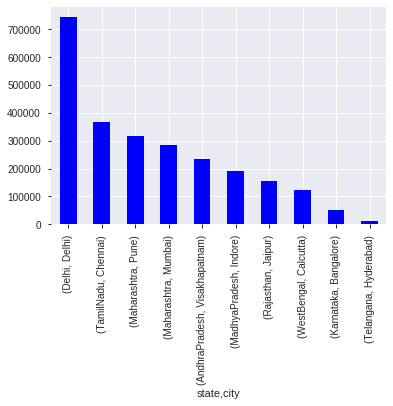

In [731]:
events.groupby(['state','city'])['device_id'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='b')

In [732]:
events.groupby(['state','city'])['event_id'].count().sort_values(ascending=False)

state          city            
Delhi          Delhi               744212
TamilNadu      Chennai             366828
Maharashtra    Pune                317213
               Mumbai              285246
AndhraPradesh  Visakhapatnam       235725
                                    ...  
               Ramachandrapuram       279
Punjab         Sirhind                269
AndhraPradesh  Tadepallegudem         264
Orissa         Brajrajnagar           263
TamilNadu      Kovilpatti             258
Name: event_id, Length: 943, dtype: int64

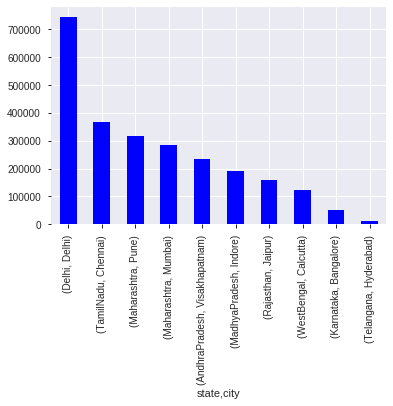

In [733]:
events.groupby(['state','city'])['event_id'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='b')

In [734]:
events.groupby('state')['event_id'].count().sort_values(ascending=False)

state
Delhi                       751733
Maharashtra                 677105
TamilNadu                   436282
AndhraPradesh               321332
MadhyaPradesh               232690
Rajasthan                   196361
WestBengal                  196161
Karnataka                    99058
UttarPradesh                 94750
Gujarat                      42881
Bihar                        35472
Punjab                       26195
Kerala                       23148
Haryana                      21053
Jharkhand                    18060
Orissa                       15904
Telangana                    12784
Assam                        12021
Chhattisgarh                  9754
Uttaranchal                   7720
JammuandKashmir               5385
Goa                           3250
Nagaland                      2298
Pondicherry                   1741
Mizoram                       1613
AndamanandNicobarIslands      1515
Meghalaya                     1515
HimachalPradesh               1409
Manipur       

Text(0, 0.5, 'Count of events')

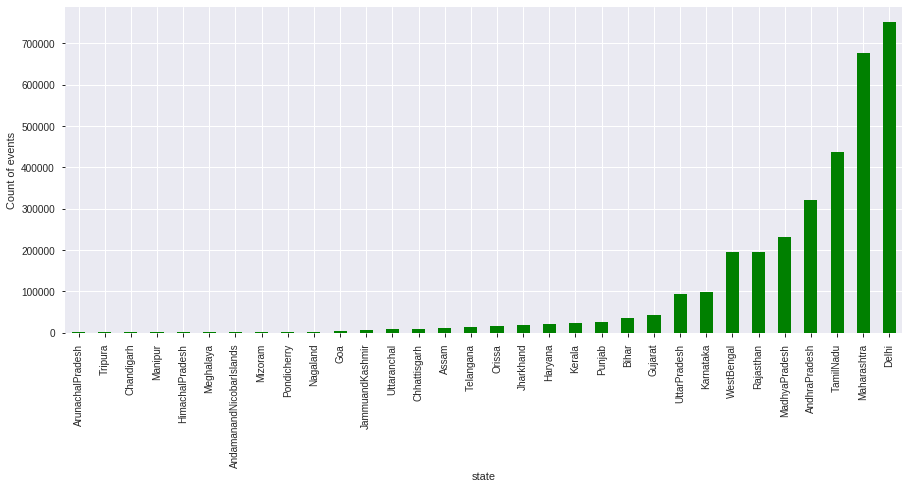

In [735]:
plt.figure(figsize = (15, 6))
events.groupby('state')['city'].count().sort_values(ascending=True).plot(kind='bar', color='g')
plt.ylabel('Count of events')

In [736]:
events.groupby('city')['event_id'].count().sort_values(ascending=False)

city
Delhi               744276
Chennai             366875
Pune                317276
Mumbai              285246
Visakhapatnam       235772
                     ...  
Ramachandrapuram       279
Sirhind                269
Tadepallegudem         264
Brajrajnagar           263
Kovilpatti             258
Name: event_id, Length: 933, dtype: int64

### Gender_AGE_Train

In [737]:
gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
0    74645 non-null int64
1    74645 non-null object
2    74645 non-null int64
3    74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [0]:
gender_age_train.columns=['device_id','gender','age','age_group']

In [263]:
gender_age_train.head()

device_id gender  age age_group
0 -8076087639492063270      M   35    M32-38
1 -2897161552818060146      M   35    M32-38
2 -8260683887967679142      M   35    M32-38
3 -4938849341048082022      M   30    M29-31
4   245133531816851882      M   30    M29-31

In [264]:
gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
age_group    74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [265]:
#missing data in gender_age_train
total = gender_age_train.isnull().sum().sort_values(ascending=False)
percent = (gender_age_train.isnull().sum()/gender_age_train.isnull().count()).sort_values(ascending=False)
missing_data_genderage = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_genderage.head(20)
print(missing_data_genderage)


           Total  Percent
age_group      0 0.000000
age            0 0.000000
gender         0 0.000000
device_id      0 0.000000


In [266]:
print("distinct age_group:", set(gender_age_train['age_group']))

distinct age_group: {'M39+', 'M27-28', 'F29-32', 'M29-31', 'F33-42', 'F24-26', 'F27-28', 'F43+', 'M23-26', 'F23-', 'M32-38', 'M22-'}


In [267]:
pd.crosstab(gender_age_train['age'],gender_age_train['age_group'] )

age_group  F23-  F24-26  F27-28  F29-32  ...  M27-28  M29-31  M32-38  M39+
age                                      ...                              
1             0       0       0       0  ...       0       0       0     0
6             0       0       0       0  ...       0       0       0     0
10            2       0       0       0  ...       0       0       0     0
11            4       0       0       0  ...       0       0       0     0
12            5       0       0       0  ...       0       0       0     0
..          ...     ...     ...     ...  ...     ...     ...     ...   ...
88            0       0       0       0  ...       0       0       0     2
89            0       0       0       0  ...       0       0       0     0
90            0       0       0       0  ...       0       0       0     1
94            0       0       0       0  ...       0       0       0     0
96            0       0       0       0  ...       0       0       0     0

[85 rows x 12 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bf6153160>,
      dtype=object)

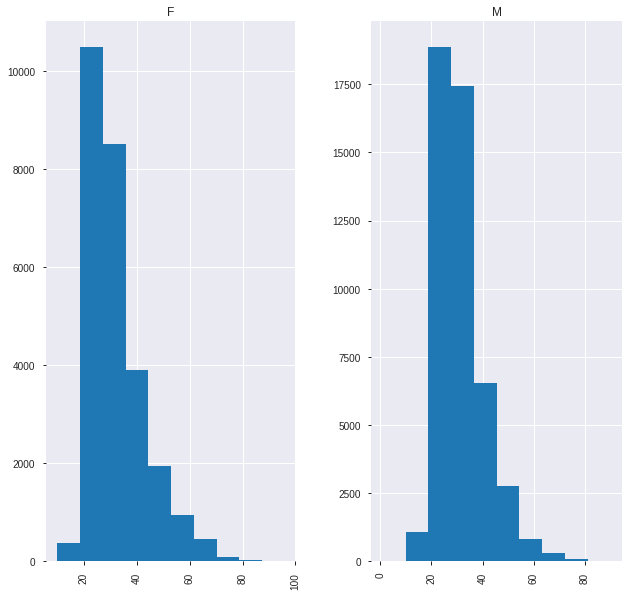

In [268]:
gender_age_train.hist(by='gender',column = 'age',figsize=(10,10))

In [269]:
gender_age_train.groupby('age_group')['device_id'].count().sort_values(ascending=False)

age_group
M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: device_id, dtype: int64

Text(0, 0.5, 'Count')

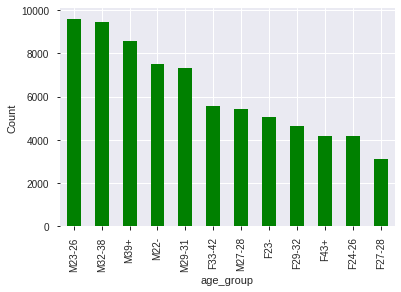

In [270]:
gender_age_train.groupby('age_group')['device_id'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')

In [271]:
gender_age_train.groupby('age')['device_id'].count().sort_values(ascending=False)[:15]

age
26    4540
27    4476
29    4343
28    4087
25    3740
30    3730
24    3501
23    3115
22    3018
31    2996
21    2994
32    2641
34    2586
33    2481
20    2349
Name: device_id, dtype: int64

Text(0, 0.5, 'Count')

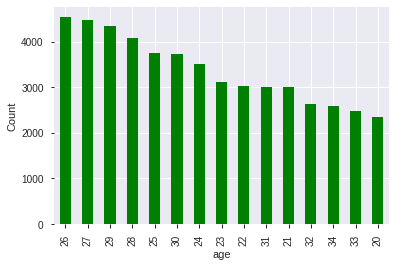

In [272]:
gender_age_train.groupby('age')['device_id'].count().sort_values(ascending=False)[:15].plot(kind='bar', color='g')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

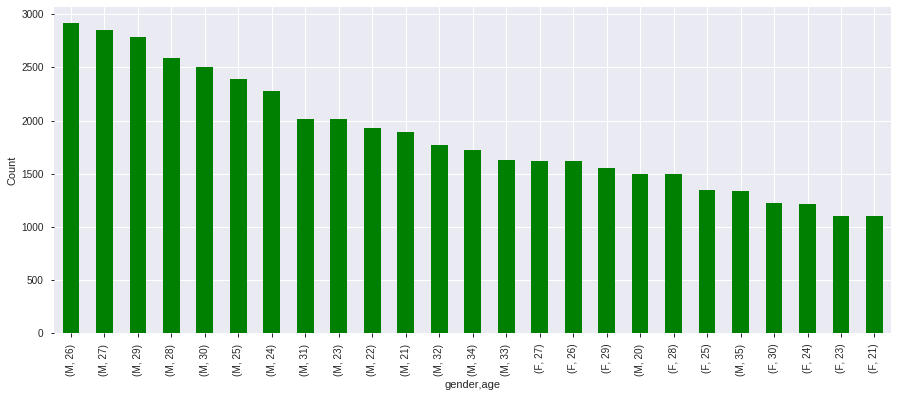

In [273]:
plt.figure(figsize = (15, 6))
gender_age_train.groupby(['gender','age'])['device_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', color='g')
plt.ylabel('Count')

###Phone_brands

In [0]:
phone_brand.columns=['device_id','brand','model']

In [275]:
phone_brand.head()

device_id brand    model
0  1877775838486905855  vivo      Y13
1 -3766087376657242966    小米     V183
2 -6238937574958215831  OPPO      R7s
3  8973197758510677470    三星    A368t
4 -2015528097870762664    小米  红米Note2

In [276]:
phone_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id    87726 non-null int64
brand        87726 non-null object
model        87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [277]:
##missing data in phone_brand
total = phone_brand.isnull().sum().sort_values(ascending=False)
percent = (phone_brand.isnull().sum()/phone_brand.isnull().count()).sort_values(ascending=False)
missing_data_phoneband = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_phoneband.head(20)
print(missing_data_phoneband)


           Total  Percent
model          0 0.000000
brand          0 0.000000
device_id      0 0.000000


## PANDAS PROFILING BEFORE DATA PROCESSING

In [278]:
!pip install pandas_profiling

In [279]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profileevents = pandas_profiling.ProfileReport(events)
profileevents.to_file("eventbeforeprocess.html")


/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [280]:
pandas_profiling.ProfileReport(events)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [0]:
from google.colab import files
files.download("eventbeforeprocess.html")

In [281]:
profilephbrand = pandas_profiling.ProfileReport(phone_brand)
profilephbrand.to_file("phbrandbeforeprocess.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [282]:
pandas_profiling.ProfileReport(phone_brand)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [0]:
from google.colab import files
files.download("phbrandbeforeprocess.html")

In [283]:
profilephbrand = pandas_profiling.ProfileReport(gender_age_train)
profilephbrand.to_file("genagebeforeprocess.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [284]:
pandas_profiling.ProfileReport(gender_age_train)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



In [0]:
from google.colab import files
files.download("genagebeforeprocess.html")

# Observations 
Events
1. 453 Device Ids are Null
2. 377 values are missing. But city are not missing. So we can update state basis of city
3. 423 records where Longitude and Latitude are NULL
4. Higest Events recored in State Delhi & Maharstra, But city wise  highest eventes recorded in Delhi and Tamilnadu

Gender_Age_train 
1. Age starting from 1 - 1 record found
2. Top 15 records of ages varying between 20 to 34
3.  Top records found of Male and with age group between 20 to 36 
4. Top 5 entries of age is less than 30years
5. Male users are more than Female users


#Analysis based on selcted States for Study. For our Group 1054 we received following states to focus

"MadhyaPradesh","Chhattisgarh", "Uttaranchal", "JammuandKashmir","Goa", "Nagaland"

In [285]:
events.query('state in ["MadhyaPradesh","Chhattisgarh", "Uttaranchal", "JammuandKashmir","Goa", "Nagaland"]')

event_id                   device_id  ...       city          state
2197849   10117.000000 -5323073305882503168.000000  ...     Indore  MadhyaPradesh
2197850  112369.000000 -5323073305882503168.000000  ...     Indore  MadhyaPradesh
2197851  139098.000000 -5323073305882503168.000000  ...     Indore  MadhyaPradesh
2197852  190983.000000 -5323073305882503168.000000  ...     Indore  MadhyaPradesh
2197853  249507.000000 -5323073305882503168.000000  ...     Indore  MadhyaPradesh
...                ...                         ...  ...        ...            ...
2458992 3218198.000000  8276999935602525184.000000  ...      Sarni  MadhyaPradesh
2458993 3241226.000000 -4634262671934505984.000000  ...    Khandwa  MadhyaPradesh
2458994 3246861.000000  3633748193818519040.000000  ...     Kohima       Nagaland
2458995 3247285.000000  2609354428070276096.000000  ...  BinaEtawa  MadhyaPradesh
2458996 3248948.000000 -8474949383582430208.000000  ...   Mandsaur  MadhyaPradesh

[261097 rows x 7 columns]

In [700]:
df_event = events.query('state in ["MadhyaPradesh","Chhattisgarh", "Uttaranchal", "JammuandKashmir","Goa", "Nagaland"]')
df_event.head()


event_id                   device_id  ...    city          state
2197849  10117.000000 -5323073305882503168.000000  ...  Indore  MadhyaPradesh
2197850 112369.000000 -5323073305882503168.000000  ...  Indore  MadhyaPradesh
2197851 139098.000000 -5323073305882503168.000000  ...  Indore  MadhyaPradesh
2197852 190983.000000 -5323073305882503168.000000  ...  Indore  MadhyaPradesh
2197853 249507.000000 -5323073305882503168.000000  ...  Indore  MadhyaPradesh

[5 rows x 7 columns]

In [702]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260983 entries, 2197849 to 2458996
Data columns (total 7 columns):
event_id     260983 non-null float64
device_id    260983 non-null float64
timestamp    260983 non-null object
longitude    260983 non-null object
latitude     260983 non-null object
city         260983 non-null object
state        260983 non-null object
dtypes: float64(2), object(5)
memory usage: 15.9+ MB


In [701]:
pd.crosstab(df_event['state'],df_event['city'] )

city             Ambikapur  Anantnag  Ashoknagar  ...  Ujjain  Vidisha  Wokha
state                                             ...                        
Chhattisgarh           539         0           0  ...       0        0      0
Goa                      0         0           0  ...       0        0      0
JammuandKashmir          0      1103           0  ...       0        0      0
MadhyaPradesh            0         0        1145  ...     480      873      0
Nagaland                 0         0           0  ...       0        0   1100
Uttaranchal              0         0           0  ...       0        0      0

[6 rows x 85 columns]

Text(0, 0.5, 'Count')

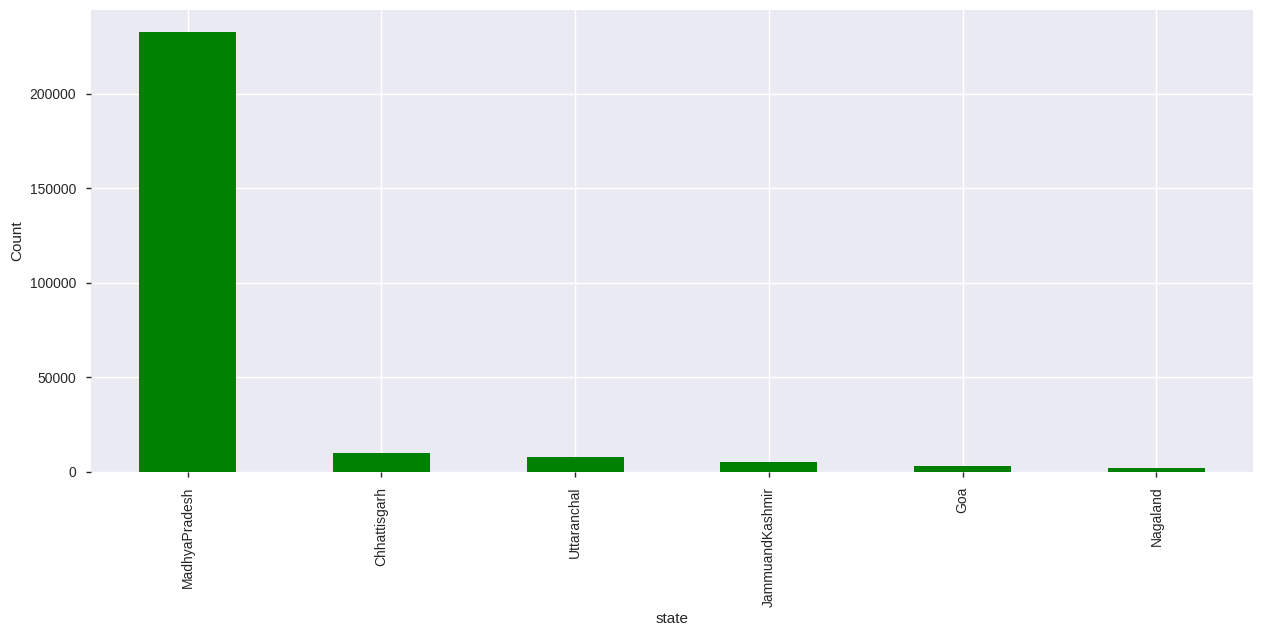

In [288]:
plt.figure(figsize = (15, 6))
df_event.groupby('state')['state'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')

In [289]:
##missing data in events for selected states for study
total = df_event.isnull().sum().sort_values(ascending=False)
percent = (df_event.isnull().sum()/df_event.isnull().count()).sort_values(ascending=False)
missing_data_dfevents = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_dfevents.head(20)
print(missing_data_dfevents)


           Total  Percent
latitude      63 0.000241
longitude     63 0.000241
device_id     51 0.000195
state          0 0.000000
city           0 0.000000
timestamp      0 0.000000
event_id       0 0.000000


In [290]:
pd.crosstab(df_event['state'],df_event['city'] )

city             Ambikapur  Anantnag  Ashoknagar  ...  Ujjain  Vidisha  Wokha
state                                             ...                        
Chhattisgarh           539         0           0  ...       0        0      0
Goa                      0         0           0  ...       0        0      0
JammuandKashmir          0      1103           0  ...       0        0      0
MadhyaPradesh            0         0        1145  ...     480      873      0
Nagaland                 0         0           0  ...       0        0   1100
Uttaranchal              0         0           0  ...       0        0      0

[6 rows x 85 columns]

#Data Processing

## DataProcessing for records where Device Ids are NULL

In [581]:
# creating bool series True for NaN values  
bool_dev = pd.isnull(events["device_id"])  

events[bool_dev]

event_id  device_id  ...     city    state
23808     72957.000000        nan  ...    Delhi    Delhi
23820     78897.000000        nan  ...    Delhi    Delhi
23831     94768.000000        nan  ...    Delhi    Delhi
23852    127677.000000        nan  ...    Delhi    Delhi
24093    442470.000000        nan  ...    Delhi    Delhi
...                ...        ...  ...      ...      ...
3098746 1882296.000000        nan  ...  Bardoli  Gujarat
3098757 1952481.000000        nan  ...  Bardoli  Gujarat
3098801 2235564.000000        nan  ...  Bardoli  Gujarat
3098833 2452592.000000        nan  ...  Bardoli  Gujarat
3098901 3050759.000000        nan  ...  Bardoli  Gujarat

[453 rows x 7 columns]

In [582]:
events[bool_dev].groupby(['state','city']).count()

event_id  device_id  ...  longitude  latitude
state         city                                ...                     
AndhraPradesh Visakhapatnam        69          0  ...         69        69
Delhi         Delhi                69          0  ...         69        69
Gujarat       Bardoli              16          0  ...         16        16
              Jetpur               16          0  ...         16        16
MadhyaPradesh Indore               51          0  ...         51        51
Maharashtra   Pune                 72          0  ...         72        72
Punjab        Hoshiarpur           16          0  ...         16        16
Rajasthan     Jaipur               81          0  ...         81        81
TamilNadu     Chennai              63          0  ...         63        63

[9 rows x 5 columns]

In [583]:
dev = events[(events['city'] == "Chennai") & (events['device_id'].isnull())] 
dev.head()

event_id  device_id  ...     city      state
1585123  58816.000000        nan  ...  Chennai  TamilNadu
1585135  62553.000000        nan  ...  Chennai  TamilNadu
1585167  97365.000000        nan  ...  Chennai  TamilNadu
1585408 315532.000000        nan  ...  Chennai  TamilNadu
1585599 477494.000000        nan  ...  Chennai  TamilNadu

[5 rows x 7 columns]

In [584]:
##events.query('longitude == 83.357991 and latitude == 17.805195',engine='python') ##6844192269280791552.000000
##events.query('longitude == 77.303153 and latitude == 28.728888',engine='python') ##not found
##events.query('longitude == 73.169345 and latitude == 21.194283',engine='python') ##not found
##events.query('longitude == 70.686387	 and latitude == 21.790693	',engine='python') ##1688015122502424064.000000
##events.query('longitude == 75.882956	 and latitude == 22.814519	',engine='python') ##not found
##events.query('longitude == 73.862756	 and latitude == 18.628057	',engine='python') ##not found
##events.query('longitude == 75.992551	 and latitude == 31.561747',engine='python') ##not found
##events.query('longitude == 75.846007	 and latitude == 26.960796',engine='python') ##not found
events.query('longitude == 80.309272	 and latitude == 13.149176',engine='python') ##7662139143719919616.000000




Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, city, state]
Index: []

####Observations 
  453 device Ids are blank. But there is no link on the basis of which we can update device ID. So it will be better that we drop the data with Null device IDs. 
  or  we can update device ids with maximum count device in the same city. but we found device numbers for 3 cities only.

In [0]:
events = events.dropna()

In [586]:
##missing data in events for selected states for study
total = events.isnull().sum().sort_values(ascending=False)
percent = (events.isnull().sum()/events.isnull().count()).sort_values(ascending=False)
missing_data_events = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_events.head(20)
print(missing_data_events)


           Total  Percent
state          0 0.000000
city           0 0.000000
latitude       0 0.000000
longitude      0 0.000000
timestamp      0 0.000000
device_id      0 0.000000
event_id       0 0.000000


## Data Processing for records where LAT -LONG are NULL

In [587]:
# creating bool series True for NaN values  
bool_long = pd.isnull(events["longitude"])  
##bool_lat = pd.isnull(events["latitude"])  

events[bool_long]

Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, city, state]
Index: []

#### Observations 
423 record have longitude and latitude are having null values. 
Same can be update on the basis of city's common lat -longs

In [588]:
events[bool_long].groupby(['state','city']).count()

Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude]
Index: []

In [589]:
lat_long = pd.merge(events[bool_long],events,how='inner', left_on='device_id', right_on='device_id')
lat_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 13 columns):
event_id_x     0 non-null float64
timestamp_x    0 non-null object
longitude_x    0 non-null float64
latitude_x     0 non-null float64
city_x         0 non-null object
state_x        0 non-null object
event_id_y     0 non-null float64
device_id      0 non-null float64
timestamp_y    0 non-null object
longitude_y    0 non-null float64
latitude_y     0 non-null float64
city_y         0 non-null object
state_y        0 non-null object
dtypes: float64(7), object(6)
memory usage: 0.0+ bytes


In [590]:
lat_long.head()

Empty DataFrame
Columns: [event_id_x, timestamp_x, longitude_x, latitude_x, city_x, state_x, event_id_y, device_id, timestamp_y, longitude_y, latitude_y, city_y, state_y]
Index: []

#### Obsservations :
  1. mutiple device IDs found in cities where lat and longs are NULL
     a. Visakhapatnam - mutiple device
     b. Araria - one Device
     c. Bagaha - one device
     d. Delhi - mutiple device
     e. Indore - multiple device
     f. Pune - mutiple device
     g. Moga - one device
     h. Jaipur - Multiple device
     i. Chennai - Multiple Device

## Cities with mutiple device ID matching for lat-long

In [0]:
##pd.options.display.float_format = '{:.3f}'.format

In [0]:
##np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [593]:
lat_long.query('city_x == "Visakhapatnam"').device_id.unique()

array([], dtype=float64)

In [594]:
lat_long.query('city_x == "Araria"').device_id.unique()

array([], dtype=float64)

In [595]:
lat_long.query('city_x == "Bagaha"').device_id.unique()

array([], dtype=float64)

In [596]:
lat_long.query('city_x == "Delhi"').device_id.unique()

array([], dtype=float64)

In [597]:
lat_long.query('city_x == "Indore"').device_id.unique()

array([], dtype=float64)

In [598]:
lat_long.query('city_x == "Pune"').device_id.unique()

array([], dtype=float64)

In [599]:
lat_long.query('city_x == "Moga"').device_id.unique()

array([], dtype=float64)

In [600]:
lat_long.query('city_x == "Jaipur"').device_id.unique()

array([], dtype=float64)

In [601]:
lat_long.query('city_x == "Chennai"').device_id.unique()

array([], dtype=float64)

In [602]:
#lat_long.query('city_x == "Chennai"')    ##Araria,Visakhapatnam,Bagaha,Delhi,Indore,Pune,Moga,Jaipur
events.query('device_id == 3099168546198768640.000 and longitude.isnull()',engine='python')


Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, city, state]
Index: []

In [0]:
dev_lat = events[(events['city'] == "Bagaha") & (events['longitude'].notnull())] 

In [604]:
dev_lat.head()  

event_id                  device_id  ...    city  state
3024968 24727.000000 3099168546198768640.000000  ...  Bagaha  Bihar
3024969 26306.000000 3099168546198768640.000000  ...  Bagaha  Bihar
3024970 26308.000000 3099168546198768640.000000  ...  Bagaha  Bihar
3024971 30838.000000 3099168546198768640.000000  ...  Bagaha  Bihar
3024972 57459.000000 3099168546198768640.000000  ...  Bagaha  Bihar

[5 rows x 7 columns]

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 3099168546198768640.000000) & (events['city'] == 'Bagaha'),'longitude']=84.1409
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 3099168546198768640.000000) & (events['city'] == 'Bagaha'),'latitude']=27.177397

In [606]:
events.query('device_id == 3099168546198768640.000 and longitude.isnull()',engine='python')

Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, city, state]
Index: []

In [607]:
events.query('device_id == 1320050977019711232.000 and longitude.isnull()',engine='python')

Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, city, state]
Index: []

In [608]:
araria_lat = events[(events['city'] == "Araria") & (events['longitude'].notnull())] 
araria_lat.head()

event_id                  device_id  ...    city  state
3023049 24397.000000 1320050977019711232.000000  ...  Araria  Bihar
3023050 34725.000000 1320050977019711232.000000  ...  Araria  Bihar
3023051 35264.000000 1320050977019711232.000000  ...  Araria  Bihar
3023052 35267.000000 1320050977019711232.000000  ...  Araria  Bihar
3023053 38057.000000 1320050977019711232.000000  ...  Araria  Bihar

[5 rows x 7 columns]

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 1320050977019711232.000000) & (events['city'] == 'Araria'),'longitude']=87.570736
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 1320050977019711232.000000) & (events['city'] == 'Araria'),'latitude']=26.211919

In [610]:
moga_lat = events[(events['city'] == "Moga") & (events['longitude'].notnull())] 
moga_lat.head()

event_id                  device_id  ...  city   state
3011425 22521.000000 6774071338248977408.000000  ...  Moga  Punjab
3011426 22522.000000 6774071338248977408.000000  ...  Moga  Punjab
3011427 29086.000000 6774071338248977408.000000  ...  Moga  Punjab
3011428 30230.000000 6774071338248977408.000000  ...  Moga  Punjab
3011429 30231.000000 6774071338248977408.000000  ...  Moga  Punjab

[5 rows x 7 columns]

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 6774071338248977408.000000) & (events['city'] == 'Moga'),'longitude']=75.268748
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 6774071338248977408.000000) & (events['city'] == 'Moga'),'latitude']=30.904178

In [612]:
visa_lat = events[(events['city'] == "Visakhapatnam") & (events['longitude'].notnull())] 
visa_lat.head()

event_id                   device_id  ...           city          state
1868677  5985.000000 -7971778470363550720.000000  ...  Visakhapatnam  AndhraPradesh
1868678 56595.000000 -7971778470363550720.000000  ...  Visakhapatnam  AndhraPradesh
1868679 75863.000000 -7971778470363550720.000000  ...  Visakhapatnam  AndhraPradesh
1868680 81849.000000 -7971778470363550720.000000  ...  Visakhapatnam  AndhraPradesh
1868681 97846.000000 -7971778470363550720.000000  ...  Visakhapatnam  AndhraPradesh

[5 rows x 7 columns]

In [613]:
events.query('city == "Visakhapatnam" and longitude.notnull() and device_id == "5518659601894558720.000"',engine='python')   
##5518659601894558720.000, -6033798388179802112.000,4865606571395668992.000

event_id                  device_id  ...           city          state
1901585    6529.000000 5518659601894558720.000000  ...  Visakhapatnam  AndhraPradesh
1901586    7197.000000 5518659601894558720.000000  ...  Visakhapatnam  AndhraPradesh
1901587    7419.000000 5518659601894558720.000000  ...  Visakhapatnam  AndhraPradesh
1901588    7843.000000 5518659601894558720.000000  ...  Visakhapatnam  AndhraPradesh
1901589    8122.000000 5518659601894558720.000000  ...  Visakhapatnam  AndhraPradesh
...                ...                        ...  ...            ...            ...
1903091 3243990.000000 5518659601894558720.000000  ...  Visakhapatnam  AndhraPradesh
1903092 3247433.000000 5518659601894558720.000000  ...  Visakhapatnam  AndhraPradesh
1903093 3250247.000000 5518659601894558720.000000  ...  Visakhapatnam  AndhraPradesh
1903094 3250657.000000 5518659601894558720.000000  ...  Visakhapatnam  AndhraPradesh
1903095 3251317.000000 5518659601894558720.000000  ...  Visakhapatnam  AndhraPradesh

[1490 rows x 7 columns]

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == -6033798388179802112.000) & (events['city'] == 'Visakhapatnam'),'longitude']=83.319787
events.loc[(events['latitude'].isnull()) & (events['device_id'] == -6033798388179802112.000) & (events['city'] == 'Visakhapatnam'),'latitude']=17.816579

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 4865606571395668992.000000) & (events['city'] == 'Visakhapatnam'),'longitude']=83.351442
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 4865606571395668992.000000) & (events['city'] == 'Visakhapatnam'),'latitude']=17.772252

In [0]:

events.loc[(events['longitude'].isnull()) & (events['device_id'] == 5518659601894558720.000000) & (events['city'] == 'Visakhapatnam'),'longitude']=83.384242
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 5518659601894558720.000000) & (events['city'] == 'Visakhapatnam'),'latitude']=17.817945

In [617]:
delhi_lat = events[(events['city'] == "Delhi") & (events['longitude'].notnull())] 
delhi_lat.head()

event_id                device_id  ...   city  state
0     1.000000 29182687948017176.000000  ...  Delhi  Delhi
1  7104.000000 29182687948017176.000000  ...  Delhi  Delhi
2 29661.000000 29182687948017176.000000  ...  Delhi  Delhi
3 33133.000000 29182687948017176.000000  ...  Delhi  Delhi
4 38980.000000 29182687948017176.000000  ...  Delhi  Delhi

[5 rows x 7 columns]

In [618]:
events.query('city == "Delhi" and longitude.notnull() and device_id == "2350979402202438656.000"',engine='python')   
##4782582047729166336.000,  1779631023439405312.000,5375599021847303168.000

Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, city, state]
Index: []

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 5375599021847303168.000000) & (events['city'] == 'Delhi'),'longitude']=77.283447
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 5375599021847303168.000000) & (events['city'] == 'Delhi'),'latitude']=28.718392

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 4782582047729166336.000) & (events['city'] == 'Delhi'),'longitude']=77.225220
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 4782582047729166336.000) & (events['city'] == 'Delhi'),'latitude']=28.718379

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 1779631023439405312.000) & (events['city'] == 'Delhi'),'longitude']=77.235416
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 1779631023439405312.000) & (events['city'] == 'Delhi'),'latitude']=28.738901

In [622]:
events.query('city == "Indore" and longitude.notnull() and device_id == "3738280493453803008.000"',engine='python')   
##2350979402202438656.000, -8790560034584249344.000,3738280493453803008.000

event_id                  device_id  ...    city          state
2231134   10819.000000 3738280493453803008.000000  ...  Indore  MadhyaPradesh
2231135   19593.000000 3738280493453803008.000000  ...  Indore  MadhyaPradesh
2231136   21130.000000 3738280493453803008.000000  ...  Indore  MadhyaPradesh
2231137   27808.000000 3738280493453803008.000000  ...  Indore  MadhyaPradesh
2231138   37083.000000 3738280493453803008.000000  ...  Indore  MadhyaPradesh
...                ...                        ...  ...     ...            ...
2231926 3228938.000000 3738280493453803008.000000  ...  Indore  MadhyaPradesh
2231927 3237217.000000 3738280493453803008.000000  ...  Indore  MadhyaPradesh
2231928 3242200.000000 3738280493453803008.000000  ...  Indore  MadhyaPradesh
2231929 3246815.000000 3738280493453803008.000000  ...  Indore  MadhyaPradesh
2231930 3251471.000000 3738280493453803008.000000  ...  Indore  MadhyaPradesh

[776 rows x 7 columns]

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 2350979402202438656.000000) & (events['city'] == 'Indore'),'longitude']=75.888474
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 2350979402202438656.000000) & (events['city'] == 'Indore'),'latitude']=22.745063

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == -8790560034584249344.000) & (events['city'] == 'Indore'),'longitude']=75.933778
events.loc[(events['latitude'].isnull()) & (events['device_id'] == -8790560034584249344.000) & (events['city'] == 'Indore'),'latitude']=22.761965

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 3738280493453803008.000) & (events['city'] == 'Indore'),'longitude']=75.937988
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 3738280493453803008.000) & (events['city'] == 'Indore'),'latitude']=22.762010

In [626]:
events.query('city == "Pune" and longitude.notnull() and device_id == "-7364840628879980544.000"',engine='python')   
##7018600380123445248.000,  5115185276392512512.000, -7364840628879980544.000

event_id                   device_id  ...  city        state
1194031    3999.000000 -7364840628879980544.000000  ...  Pune  Maharashtra
1194032    4236.000000 -7364840628879980544.000000  ...  Pune  Maharashtra
1194033    5483.000000 -7364840628879980544.000000  ...  Pune  Maharashtra
1194034    6811.000000 -7364840628879980544.000000  ...  Pune  Maharashtra
1194035   10469.000000 -7364840628879980544.000000  ...  Pune  Maharashtra
...                ...                         ...  ...   ...          ...
1196651 3248539.000000 -7364840628879980544.000000  ...  Pune  Maharashtra
1196652 3248858.000000 -7364840628879980544.000000  ...  Pune  Maharashtra
1196653 3250575.000000 -7364840628879980544.000000  ...  Pune  Maharashtra
1196654 3250707.000000 -7364840628879980544.000000  ...  Pune  Maharashtra
1196655 3252493.000000 -7364840628879980544.000000  ...  Pune  Maharashtra

[2604 rows x 7 columns]

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 7018600380123445248.000000) & (events['city'] == 'Pune'),'longitude']=73.926223
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 7018600380123445248.000000) & (events['city'] == 'Pune'),'latitude']=18.575747

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 5115185276392512512.000000) & (events['city'] == 'Pune'),'longitude']=73.888680
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 5115185276392512512.000000) & (events['city'] == 'Pune'),'latitude']=18.556741

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == -7364840628879980544.000) & (events['city'] == 'Pune'),'longitude']=73.931944
events.loc[(events['latitude'].isnull()) & (events['device_id'] == -7364840628879980544.000) & (events['city'] == 'Pune'),'latitude']=18.540740

In [630]:
events.query('city == "Jaipur" and longitude.notnull() and device_id == "4375039830232869888.000"',engine='python')   
##4580179444377398272.000,  305848775386534912.000,4375039830232869888.000

event_id                  device_id  ...    city      state
2576673   18788.000000 4375039830232869888.000000  ...  Jaipur  Rajasthan
2576674   22962.000000 4375039830232869888.000000  ...  Jaipur  Rajasthan
2576675   42168.000000 4375039830232869888.000000  ...  Jaipur  Rajasthan
2576676   43723.000000 4375039830232869888.000000  ...  Jaipur  Rajasthan
2576677   52886.000000 4375039830232869888.000000  ...  Jaipur  Rajasthan
...                ...                        ...  ...     ...        ...
2577266 3219460.000000 4375039830232869888.000000  ...  Jaipur  Rajasthan
2577267 3222399.000000 4375039830232869888.000000  ...  Jaipur  Rajasthan
2577268 3236251.000000 4375039830232869888.000000  ...  Jaipur  Rajasthan
2577270 3249786.000000 4375039830232869888.000000  ...  Jaipur  Rajasthan
2577271 3252894.000000 4375039830232869888.000000  ...  Jaipur  Rajasthan

[577 rows x 7 columns]

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 4580179444377398272.000000) & (events['city'] == 'Jaipur'),'longitude']=75.835756
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 4580179444377398272.000000) & (events['city'] == 'Jaipur'),'latitude']=26.960220

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 305848775386534912.000000) & (events['city'] == 'Jaipur'),'longitude']=75.865534
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 305848775386534912.000000) & (events['city'] == 'Jaipur'),'latitude']=26.987566

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 4375039830232869888.000) & (events['city'] == 'Jaipur'),'longitude']=75.824489
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 4375039830232869888.000) & (events['city'] == 'Jaipur'),'latitude']=26.980345

In [634]:
events.query('city == "Chennai" and longitude.notnull() and device_id == "5731369272434022400.000"',engine='python')   
##7662139143719919616.000,  7983871429718484992.000, 5731369272434022400.000

event_id                  device_id  ...     city      state
1648184     938.000000 5731369272434022400.000000  ...  Chennai  TamilNadu
1648185    2199.000000 5731369272434022400.000000  ...  Chennai  TamilNadu
1648186    8008.000000 5731369272434022400.000000  ...  Chennai  TamilNadu
1648187   11003.000000 5731369272434022400.000000  ...  Chennai  TamilNadu
1648188   12856.000000 5731369272434022400.000000  ...  Chennai  TamilNadu
...                ...                        ...  ...      ...        ...
1651713 3250778.000000 5731369272434022400.000000  ...  Chennai  TamilNadu
1651714 3250865.000000 5731369272434022400.000000  ...  Chennai  TamilNadu
1651715 3251010.000000 5731369272434022400.000000  ...  Chennai  TamilNadu
1651716 3251127.000000 5731369272434022400.000000  ...  Chennai  TamilNadu
1651717 3252640.000000 5731369272434022400.000000  ...  Chennai  TamilNadu

[3492 rows x 7 columns]

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 7662139143719919616.000000) & (events['city'] == 'Chennai'),'longitude']=80.309272
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 7662139143719919616.000000) & (events['city'] == 'Chennai'),'latitude']=13.149176

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 7983871429718484992.000000	) & (events['city'] == 'Chennai'),'longitude']=80.335435
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 7983871429718484992.000000	) & (events['city'] == 'Chennai'),'latitude']=13.189053

In [0]:
events.loc[(events['longitude'].isnull()) & (events['device_id'] == 5731369272434022400.000	) & (events['city'] == 'Chennai'),'longitude']=80.343613
events.loc[(events['latitude'].isnull()) & (events['device_id'] == 5731369272434022400.000	) & (events['city'] == 'Chennai'),'latitude']=13.153332

In [638]:
total = events.isnull().sum().sort_values(ascending=False)
percent = (events.isnull().sum()/events.isnull().count()).sort_values(ascending=False)
missing_data_events = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_events.head(20)
print(missing_data_events)

           Total  Percent
state          0 0.000000
city           0 0.000000
latitude       0 0.000000
longitude      0 0.000000
timestamp      0 0.000000
device_id      0 0.000000
event_id       0 0.000000


## Data Processing for records where state is NULL

In [639]:
# creating bool series True for NaN values  
bool_series = pd.isnull(events["state"])  
    
# filtering data  
# displaying data only with state = NaN  
events[bool_series]


Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, city, state]
Index: []

In [640]:
events[bool_series].groupby('city').count()

Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, state]
Index: []

In [641]:
events[(events['city'] == "Visakhapatnam")]    ##Arambagh,Channapatna,Chennai,Delhi,Gangarampur,Indore,Jaipur,Pune,Visakhapatnam	

event_id  ...          state
1868677    5985.000000  ...  AndhraPradesh
1868678   56595.000000  ...  AndhraPradesh
1868679   75863.000000  ...  AndhraPradesh
1868680   81849.000000  ...  AndhraPradesh
1868681   97846.000000  ...  AndhraPradesh
...                ...  ...            ...
2194869 2175248.000000  ...  AndhraPradesh
2195335  723262.000000  ...  AndhraPradesh
2197469 2012407.000000  ...  AndhraPradesh
2197622 2330241.000000  ...  AndhraPradesh
2197800 2957421.000000  ...  AndhraPradesh

[235593 rows x 7 columns]

In [642]:
events[(events['state'].isnull()) & (events['city'] == "Delhi")]
##events[(events['state'] == "Delhi")]


Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, city, state]
Index: []

In [643]:
events.head()

event_id                device_id  ...   city  state
0     1.000000 29182687948017176.000000  ...  Delhi  Delhi
1  7104.000000 29182687948017176.000000  ...  Delhi  Delhi
2 29661.000000 29182687948017176.000000  ...  Delhi  Delhi
3 33133.000000 29182687948017176.000000  ...  Delhi  Delhi
4 38980.000000 29182687948017176.000000  ...  Delhi  Delhi

[5 rows x 7 columns]

In [0]:
events["longitude"] = events["longitude"].round(6).astype(str)
events["latitude"] = events["latitude"].round(6).astype(str)


In [645]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3251697 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     float64
device_id    float64
timestamp    object
longitude    object
latitude     object
city         object
state        object
dtypes: float64(2), object(5)
memory usage: 198.5+ MB


In [646]:
dl = events[(events['city'] == "Pune")]
dl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317078 entries, 1036301 to 1428900
Data columns (total 7 columns):
event_id     317078 non-null float64
device_id    317078 non-null float64
timestamp    317078 non-null object
longitude    317078 non-null object
latitude     317078 non-null object
city         317078 non-null object
state        317078 non-null object
dtypes: float64(2), object(5)
memory usage: 19.4+ MB


#### Observations 
1. 377 states are blank but cities found for such entries. On the basis of city we can update states as follows
1. Arambaugh  - WestBengal
2. Channapatna - Karnataka
3. Chennai - Tamilnadu
4. Delhi - Delhi
5. Gangarampur - WestBengal
6. Indore - Madhyapradesh
7. Jaipur - Rajasthan
8. Pune - Maharashtra
9. Visakhapatnam - Andhrapradesh


In [647]:
events[bool_series].groupby('city').count()

Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, state]
Index: []

In [0]:
events.loc[(events['state'].isnull()) & (events['city'] == 'Arambagh'),'state']='WestBengal'
events.loc[(events['state'].isnull()) & (events['city'] == 'Channapatna'),'state']='Karnataka'
events.loc[(events['state'].isnull()) & (events['city'] == 'Chennai'),'state']='TamilNadu'
events.loc[(events['state'].isnull()) & (events['city'] == 'Gangarampur'),'state']='WestBengal'
events.loc[(events['state'].isnull()) & (events['city'] == 'Indore'),'state']='MadhyaPradesh'
events.loc[(events['state'].isnull()) & (events['city'] == 'Jaipur'),'state']='Rajasthan'
events.loc[(events['state'].isnull()) & (events['city'] == 'Pune'),'state']='Maharashtra'
events.loc[(events['state'].isnull()) & (events['city'] == 'Visakhapatnam'),'state']='AndhraPradesh'
events.loc[(events['state'].isnull()) & (events['city'] == 'Delhi'),'state']='Delhi'

In [649]:
events[(events['state'].isnull())]

Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, city, state]
Index: []

In [650]:
##missing data in events
total = events.isnull().sum().sort_values(ascending=False)
percent = (events.isnull().sum()/events.isnull().count()).sort_values(ascending=False)
missing_data_events = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_events.head(20)
print(missing_data_events)

           Total  Percent
state          0 0.000000
city           0 0.000000
latitude       0 0.000000
longitude      0 0.000000
timestamp      0 0.000000
device_id      0 0.000000
event_id       0 0.000000


In [651]:
events.groupby('state')['city'].value_counts()

state                     city         
AndamanandNicobarIslands  PortBlair          1515
AndhraPradesh             Visakhapatnam    235593
                          Bodhan             1539
                          Sattenapalle       1521
                          Kodar              1488
                                            ...  
WestBengal                Rajpur              439
                          Siuri               433
                          DumDum              423
                          AlipurDuar          383
                          Khardaha            370
Name: city, Length: 943, dtype: int64

Text(0, 0.5, 'Count')

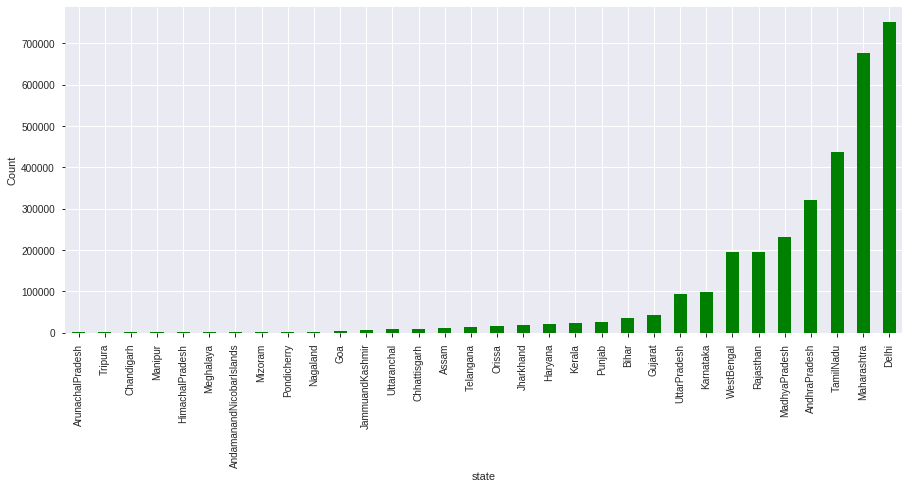

In [652]:
plt.figure(figsize = (15, 6))
events.groupby('state')['city'].count().sort_values(ascending=True).plot(kind='bar', color='g')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

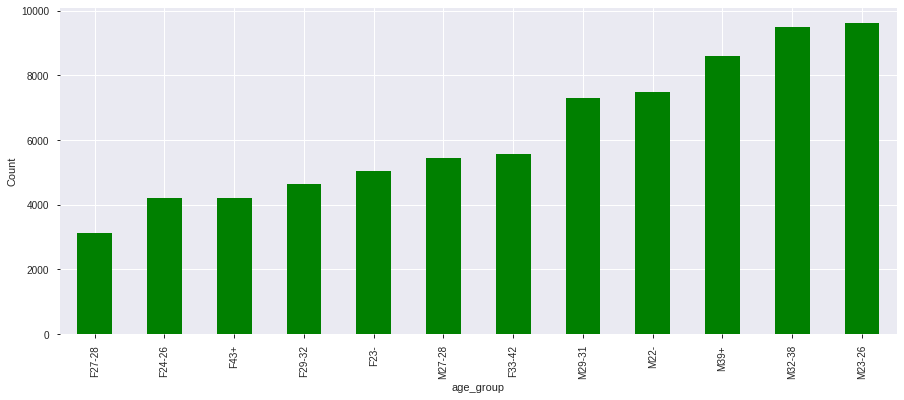

In [653]:
plt.figure(figsize = (15, 6))
gender_age_train.groupby('age_group')['age'].count().sort_values(ascending=True).plot(kind='bar', color='g')
plt.ylabel('Count')


Observation :
1. Age grouping is contactinated with Gender due to which group analyis misguiding. Age Grouping is different for male and female

In [0]:
##gender_age_train['gendersub'] =gender_age_train.age_group.str.slice(1,6)
##gender_age_train.head()

In [0]:
##gender_age_train.device_id=gender_age_train.astype(str)
##phone_brand.device_id = phone_brand.astype(str)
##events.device_id = events.astype(str)
##events.event_id = events.astype(str)

In [656]:
phone_brand.groupby('model')['device_id'].count().sort_values(ascending=False).head(20)

model
红米note           3500
MI 3             2739
MI 2S            2547
Galaxy Note 3    2378
MI 4             2256
Galaxy S4        1910
Galaxy Note 2    1877
荣耀6              1471
荣耀畅玩4X           1279
荣耀3C             1206
红米1S             1191
红米               1168
Galaxy S3        1156
Mate 7           1125
魅蓝NOTE           1026
红米2               941
红米Note2           903
MX3               842
Galaxy S5         827
荣耀6 Plus          815
Name: device_id, dtype: int64

In [657]:
print("distinct Model:", set(phone_brand['model']))

distinct Model: {'Q301C', 'Galaxy Trend DUOS 2', '大神F1Plus', 'D500', '红辣椒Note3', '小辣椒 6', 'X3F', 'A630', 'X10i', 'Galaxy Win', '6607', 'E7', '8721', '乐檬K3 Note', 'R830', 'Y511-T00', 'H1', 'L5Pro', 'P70', '8085q', 'a218t', 'I9118', '9976A', '5860S', 'ZenFone 5', 'GN305', 'M030', 'N821', 'S660', 'R817T', 'GN700T', 'Y29L', 'S810t', 'Galaxy Gio', 'Galaxy Ace Dear', 'U59GT', 'Xperia S', 'Xperia ZR', 'G630', '火星一号', 'A706', 'Galaxy Tab 4 T331C', 'X6 Plus D', 'Y11IW', '黄金斗士Note8', 'OKU3', 'C8816', '天鉴W900', '5876', 'A850+', 'T00G', 'A3800d', '天鉴W808', 'G7 Plus', 'A269i', 'R811', 'G730-U30', '红米2A', 'V818', 'Grand X', 'I8268', 'U7', 'P970', 'XT615', 'E601M', 'GN705', 'Y23L', 'Y22', 'S938t', '5891Q', 'Galaxy K Zoom', '大神Note3', 'T958', 'Galaxy Alpha', 'S880', 'Y20T', 'C8817E', 'G521', '倾城L3C', '醉享', 'V95', 'Y1', 'U939', 'Xperia SP', 'Mate 7', 'V10', 'VIBE X', 'R5s plus', 'V701s Core4', 'Galaxy S Advance', 'V965T', 'Desire 820 Mini', 'Galaxy Tab Pro T321', 'GN139', 'HN3-U01', 'U817', 'GN150', 'R

In [658]:
print("distinct brand:", set(phone_brand['brand']))

distinct brand: {'三星', '夏新', '富可视', '奥克斯', '谷歌', '宝捷讯', '百立丰', 'TCL', '长虹', '首云', '酷派', '爱派尔', 'LG', '锤子', '语信', '诺基亚', 'E派', '中国移动', '贝尔丰', '西米', '欧奇', '欧比', '联想 ', '青葱', '智镁', 'vivo', '神舟', '西门子', '金星数码', '海信', '瑞米', '欧乐迪', '纽曼', '小杨树', '广信', '酷比', '波导', '先锋', '欧沃', '乡米', '惠普', '黑米', '乐视', '台电', '美图', 'ZUK', '凯利通', '易派', 'MIL', '蓝魔', '虾米', '德赛', '大Q', '鲜米', '丰米', 'PPTV', '瑞高', '飞秒', '天语', 'OPPO', '百加', '世纪星', '梦米', 'HTC', '维图', '华硕', '糖葫芦', '唯米', '艾优尼', '奇酷', '唯比', 'E人E本', '大显', '聆韵', '大可乐', '赛博宇华', '朵唯', '海尔', '优米', '普耐尔', '果米', '欧新', 'Lovme', '尼比鲁', '本为', '基伍', '恒宇丰', '米奇', '酷珀', '摩乐', '诺亚信', '亿通', '酷比魔方', 'SUGAR', '摩托罗拉', '糯米', '一加', '米歌', '华为', '昂达', '魅族', '帷幄', '优购', '沃普丰', 'LOGO', '飞利浦', '优语', '康佳', '青橙', '至尊宝', '邦华', '斐讯', '努比亚', '白米', '小米', '欧博信'}


In [659]:
phone_brand['model'].value_counts().count()

1467

In [660]:
phone_brand['brand'].value_counts().count()

116

In [661]:
phone_brand.groupby('brand')['model'].value_counts().count()   ##.sort_values(ascending=False).plot(kind='bar', color='g')

1522

In [662]:


df = pd.crosstab(phone_brand['brand'],phone_brand['model'] ).sum()
df.tail()

model
麦芒4          201
黄金斗士A8       150
黄金斗士Note8     33
黄金斗士S8畅玩版      6
黄金斗士青春版        5
dtype: int64

## Translation of Brand values to English

In [0]:
##!pip install googletrans

In [0]:
# Language Translator
from googletrans import Translator  # Import Translator module from googletrans package

translator = Translator() # Create object of Translator.

In [665]:
d = []
translatedList = translator.translate(['首云', '酷珀', '欧乐迪', '诺亚信', '长虹', '先锋', '摩乐', '奥克斯', '华硕', '尼比鲁', '智镁', '诺基亚', '鲜米', 
                                       '惠普', '天语', '瑞米', '神舟', '糯米', '艾优尼', '白米', '努比亚', '金星数码', '凯利通', '斐讯', 'Lovme', '沃普丰', 
                                       '帷幄', 'LG', '欧比', '聆韵', '糖葫芦', 'LOGO', '唯比', '富可视', '奇酷', '普耐尔', '德赛', '联想 ', '海尔', '百加', 
                                       '飞秒', 'PPTV', '广信', '瑞高', '海信', 'OPPO', '朵唯', '百立丰', '谷歌', 'MIL', '青橙', '世纪星', '易派', '三星', 
                                       '青葱', 'ZUK', '大显', '美图', '邦华', '宝捷讯', '康佳', '黑米', '亿通', '魅族', '酷比', 'HTC', '酷派', '乡米', 
                                       '摩托罗拉', '梦米', '唯米', 'TCL', '基伍', '爱派尔', '一加', '恒宇丰', '米歌', '至尊宝', '夏新', '优米', 'E派', '波导', 
                                       '昂达', '本为', '优购', '飞利浦', '纽曼', '赛博宇华', '优语', '欧奇', '华为', '虾米', '蓝魔', 'E人E本', '大Q', '乐视', 
                                       '果米', '小杨树', '欧新', '台电', 'vivo', '欧沃', '西米', '丰米', '欧博信', '酷比魔方', 'SUGAR', '锤子', '西门子', '维图',
                                       '米奇', '小米', '大可乐', '语信', '贝尔丰', '中国移动'])

for translated in translatedList:
     d.append({'brand': translated.origin, 'converted_brand':translated.text})
     

df1 = pd.DataFrame(data=d)

JSONDecodeError: ignored

In [666]:
df1

brand  converted_brand
0      首云          Shouyun
1      酷珀            Koku珀
2     欧乐迪          Oral-Di
3     诺亚信      Noah letter
4      长虹        Changhong
..    ...              ...
111    小米           Millet
112   大可乐         Big Cola
113    语信  Language letter
114   贝尔丰       Bellefonte
115  中国移动     China Mobile

[116 rows x 2 columns]

In [667]:
phone_conv = pd.merge(phone_brand,df1, how='inner', left_on='brand', right_on='brand')
phone_conv.head()


device_id brand      model converted_brand
0  1877775838486905855  vivo        Y13            vivo
1 -8705713195059105949  vivo       X6 L            vivo
2  7284092388756598809  vivo        Y35            vivo
3  -298209719519394007  vivo  Xperia SL            vivo
4  5191524460861112478  vivo       Y17T            vivo

In [668]:
phone_conv.shape

(87726, 4)

## Translation of Model values to English

In [669]:
data = set(phone_brand['model'])
data

{'Q301C',
 'Galaxy Trend DUOS 2',
 '大神F1Plus',
 'D500',
 '红辣椒Note3',
 '小辣椒 6',
 'X3F',
 'A630',
 'X10i',
 'Galaxy Win',
 '6607',
 'E7',
 '8721',
 '乐檬K3 Note',
 'R830',
 'Y511-T00',
 'H1',
 'L5Pro',
 'P70',
 '8085q',
 'a218t',
 'I9118',
 '9976A',
 '5860S',
 'ZenFone 5',
 'GN305',
 'M030',
 'N821',
 'S660',
 'R817T',
 'GN700T',
 'Y29L',
 'S810t',
 'Galaxy Gio',
 'Galaxy Ace Dear',
 'U59GT',
 'Xperia S',
 'Xperia ZR',
 'G630',
 '火星一号',
 'A706',
 'Galaxy Tab 4 T331C',
 'X6 Plus D',
 'Y11IW',
 '黄金斗士Note8',
 'OKU3',
 'C8816',
 '天鉴W900',
 '5876',
 'A850+',
 'T00G',
 'A3800d',
 '天鉴W808',
 'G7 Plus',
 'A269i',
 'R811',
 'G730-U30',
 '红米2A',
 'V818',
 'Grand X',
 'I8268',
 'U7',
 'P970',
 'XT615',
 'E601M',
 'GN705',
 'Y23L',
 'Y22',
 'S938t',
 '5891Q',
 'Galaxy K Zoom',
 '大神Note3',
 'T958',
 'Galaxy Alpha',
 'S880',
 'Y20T',
 'C8817E',
 'G521',
 '倾城L3C',
 '醉享',
 'V95',
 'Y1',
 'U939',
 'Xperia SP',
 'Mate 7',
 'V10',
 'VIBE X',
 'R5s plus',
 'V701s Core4',
 'Galaxy S Advance',
 'V965T',
 'Desir

In [670]:
conv_model =pd.DataFrame(data = set(phone_brand['model']))
conv_model.columns=['model']
conv_model

model
0                   Q301C
1     Galaxy Trend DUOS 2
2                大神F1Plus
3                    D500
4                红辣椒Note3
...                   ...
1462                 603e
1463                D516w
1464                78P01
1465                G610M
1466         Galaxy Ace 4

[1467 rows x 1 columns]

In [671]:
!pip install langdetect

In [0]:
from langdetect import detect

In [673]:
translations = {}


for column in conv_model.columns:
    # unique elements of the column
    unique_elements = conv_model[column].unique()
    for element in unique_elements:
       try :
          # add translation to the dictionary
          ##translations[element] = translator.translate('A366t').text
          lang  = detect(element)
          print(element)
          print(lang)
          if (lang == 'en') :
              translations[element] = element
          else :
              translations[element] = translator.translate(element,dest='en').text

       except :
             lang='no'                                                  
             print("This row throws error:", translations[element])                 
             translations.append(lang)    
             translations[element] = element            
        
    



print(translations)

Q301C
vi


KeyError: ignored

In [0]:
translator = Translator()

In [674]:
m = []
i= 0
for i in range(len(conv_model)) :
    
     x = conv_model.loc[i, "model"]
     print(x)
     translated = translator.translate(x)

print(translated.origin)
     ##print(translated.text)

       
     
   
    
      ##print(translatedListm)
      ##for translatedm in translatedListm:
      ## m.append({'model': x, 'converted_model':})
     

mf2 = pd.DataFrame(data=m)
    

Q301C


JSONDecodeError: ignored

In [675]:
mf2

NameError: ignored

In [676]:
pd.crosstab(phone_conv['converted_brand'],phone_brand['model'] )

model            1100  1105  1107  2  ...  黄金斗士A8  黄金斗士Note8  黄金斗士S8畅玩版  黄金斗士青春版
converted_brand                       ...                                       
A plus              0     0     0  0  ...       0          0          0        0
ASUS                0     0     0  0  ...       0          0          0        0
Ai Unocal           0     0     0  0  ...       0          0          0        0
Amagatarai          0     0     1  0  ...       0          0          0        0
Amoi                0     0     0  0  ...       0          0          0        0
...               ...   ...   ... ..  ...     ...        ...        ...      ...
hammer              0     0     1  0  ...       0          0          0        0
pioneer             0     0     0  0  ...       0          0          0        0
vivo                1     5    10  3  ...      15          3          0        0
waveguide           0     0     0  0  ...       0          0          0        0
亿通                  0     0     0  0  ...       0          0          0        0

[116 rows x 1467 columns]

## Dates


In [580]:
pd.to_datetime(events.timestamp,format= "%Y-%d-%m %H:%M:%S") 

ValueError: ignored

In [569]:
events['week'] = events['timestamp'].dt.week
events['month'] = events['timestamp'].dt.month
events['year'] = events['timestamp'].dt.year
events['week-year'] = events['timestamp'].dt.strftime('%Y-%U')
events['month-year'] = events['timestamp'].dt.strftime('%Y-%m')

AttributeError: ignored

In [571]:
events.timestamp.head()

0    2016-05-01 00:55:25
1    2016-05-02 09:37:02
2    2016-05-04 00:56:04
3    2016-05-06 05:01:15
4    2016-05-06 09:55:04
Name: timestamp, dtype: object

# Exploratory Data Analysis after Data Processing

## EDA on complete Data (All states)

In [383]:
device_merge = pd.merge(gender_age_train,phone_conv, how='inner', left_on='device_id', right_on='device_id')
device_merge.head()

device_id gender  age age_group  brand      model converted_brand
0 -8076087639492063270      M   35    M32-38     小米       MI 2          Millet
1 -2897161552818060146      M   35    M32-38     小米       MI 2          Millet
2 -8260683887967679142      M   35    M32-38     小米       MI 2          Millet
3 -4938849341048082022      M   30    M29-31     三星  Galaxy S4         Samsung
4   245133531816851882      M   30    M29-31  SUGAR       时尚手机           SUGAR

In [384]:
device_merge.shape

(74617, 7)

In [385]:
device_merge.count()

device_id          74617
gender             74617
age                74617
age_group          74617
brand              74617
model              74617
converted_brand    74617
dtype: int64

In [386]:
device_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74617 entries, 0 to 74616
Data columns (total 7 columns):
device_id          74617 non-null int64
gender             74617 non-null object
age                74617 non-null int64
age_group          74617 non-null object
brand              74617 non-null object
model              74617 non-null object
converted_brand    74617 non-null object
dtypes: int64(2), object(5)
memory usage: 4.6+ MB


In [387]:
final_set.info()     ## Events + phone_brand+gender

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14290 entries, 0 to 14289
Data columns (total 13 columns):
event_id           14290 non-null float64
device_id          14290 non-null float64
timestamp          14290 non-null object
longitude          14290 non-null object
latitude           14290 non-null object
city               14290 non-null object
state              14290 non-null object
gender             14290 non-null object
age                14290 non-null int64
age_group          14290 non-null object
brand              14290 non-null object
model              14290 non-null object
converted_brand    14290 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 1.5+ MB


In [388]:
final_set = pd.merge(events,device_merge,how='inner', left_on='device_id', right_on='device_id')
final_set.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:1089: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation



event_id                  device_id  ...  model  converted_brand
0   492.000000 2973347786994914304.000000  ...  UIMI3     Quality rice
1 38049.000000 2973347786994914304.000000  ...  UIMI3     Quality rice
2 58908.000000 2973347786994914304.000000  ...  UIMI3     Quality rice
3 58957.000000 2973347786994914304.000000  ...  UIMI3     Quality rice
4 73519.000000 2973347786994914304.000000  ...  UIMI3     Quality rice

[5 rows x 13 columns]

In [389]:
final_set.shape

(14290, 13)

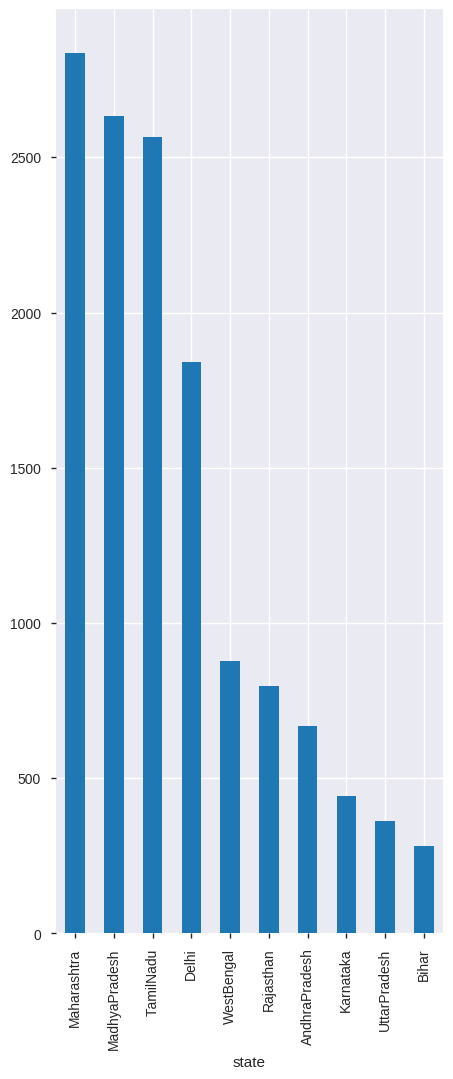

In [390]:
final_set.groupby(['state'])['device_id'].count().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(5,12))

In [391]:
final_set.groupby('state')['device_id'].count().sort_values(ascending=False)

state
Maharashtra         2835
MadhyaPradesh       2633
TamilNadu           2566
Delhi               1841
WestBengal           879
Rajasthan            796
AndhraPradesh        669
Karnataka            444
UttarPradesh         363
Bihar                281
Haryana              278
Gujarat              129
ArunachalPradesh     110
Telangana            102
JammuandKashmir       78
Kerala                57
Nagaland              56
Chhattisgarh          50
Jharkhand             45
Punjab                32
Orissa                23
Assam                  9
Goa                    7
Tripura                4
Chandigarh             3
Name: device_id, dtype: int64

In [392]:
final_set.groupby(['state','city'])['device_id'].count()

state          city      
AndhraPradesh  Adilabad       6
               Alwal         74
               Anakapalle     1
               Anantapur      6
               Belampalli    56
                             ..
WestBengal     Kharagpur     43
               Naihati        2
               Pujali         6
               Shiliguri      1
               Ulubaria       2
Name: device_id, Length: 168, dtype: int64

In [425]:
uniqueBrand = final_set.converted_brand.unique()
uniqueBrand

array(['Quality rice', 'Samsung', 'OPPO', 'TV Plus', 'Millet',
       'China Mobile', 'Cool', 'vivo', 'HTC', 'Huawei', 'Meizu', 'P Nair',
       'Amagatarai', 'Associate', 'Mito', 'Nubian', 'Doo', 'LG', '亿通',
       'hammer', 'CUBE'], dtype=object)

In [426]:
uniqueBrand.shape

(21,)

In [429]:
final_set.groupby(['converted_brand'])['event_id'].count().sort_values(ascending=False)

converted_brand
Samsung         4424
Millet          3585
Huawei          1973
vivo            1045
OPPO             874
Meizu            758
Cool             647
HTC              336
TV Plus          240
Quality rice     194
Amagatarai        92
P Nair            40
China Mobile      21
亿通                17
Mito              13
Nubian            13
CUBE               8
Associate          4
LG                 3
Doo                2
hammer             1
Name: event_id, dtype: int64

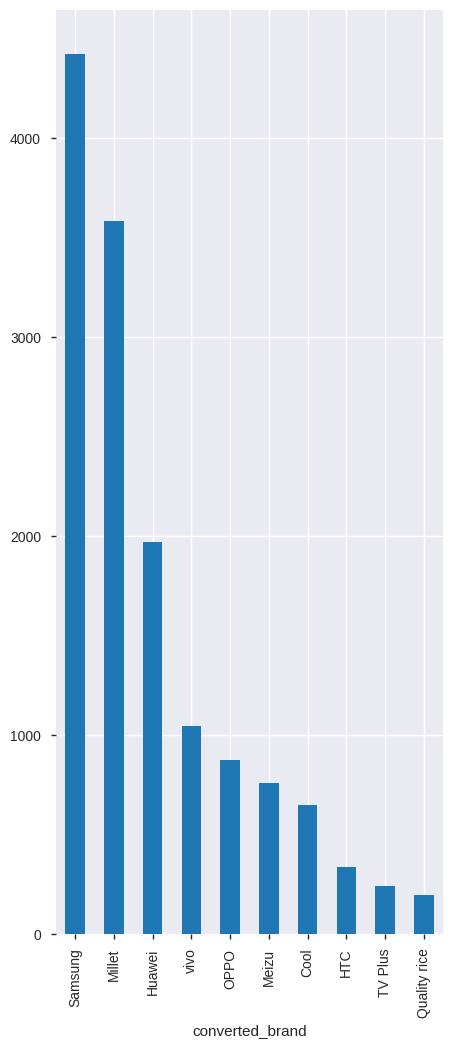

In [427]:
final_set.groupby(['converted_brand'])['event_id'].count().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(5,12))

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 20159 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 36890 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning:

Glyph 20159 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning:

Glyph 36890 missing from current font.



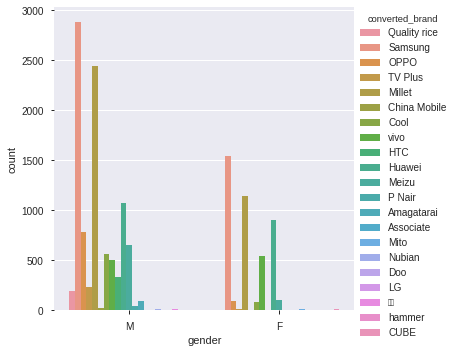

In [454]:
import seaborn as sns 
import matplotlib.pyplot as plt 
  
# Countplot 
sns.catplot(x ="gender", hue ="converted_brand",  
kind ="count", data = final_set) 

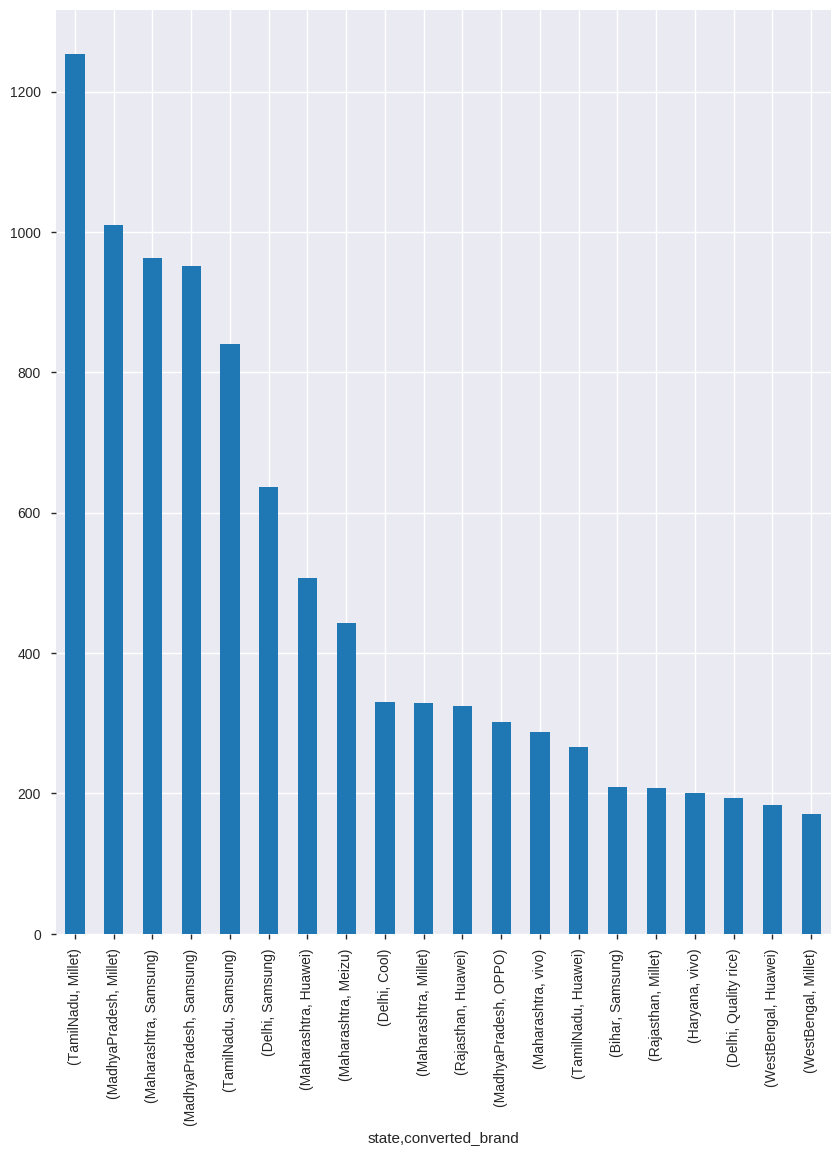

In [430]:
final_set.groupby(['state','converted_brand'])['converted_brand'].count().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(10,12))

In [432]:
final_set.groupby(['age','converted_brand'])['converted_brand'].count().sort_values(ascending=False)[:20]

age  converted_brand
26   Millet             1215
27   Samsung             731
31   Samsung             682
32   Samsung             466
36   Samsung             437
29   Huawei              379
43   Cool                330
57   Millet              306
49   Millet              299
24   OPPO                297
30   Samsung             289
28   Huawei              245
26   Huawei              235
38   Millet              220
44   Samsung             209
23   Huawei              200
47   vivo                200
27   vivo                197
35   Quality rice        194
50   Millet              191
Name: converted_brand, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

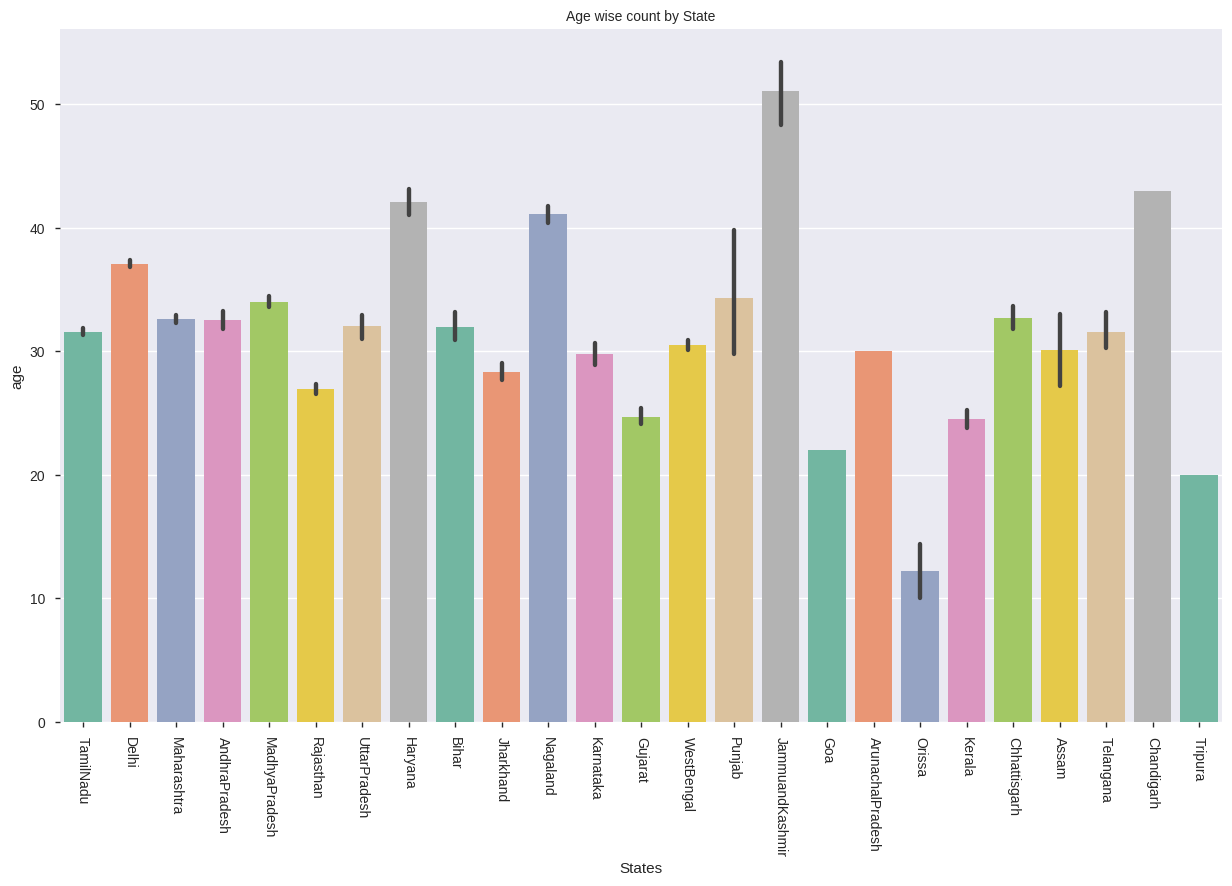

In [438]:
fig, ax1 = plt.subplots() 
fig.set_size_inches(15,  9) 
  
  
ax1 = sns.barplot(x ="state", y ="age",  
                  data = final_set.sort_values('event_id'),  
                                        palette ="Set2") 
  
ax1.set(xlabel ='States', ylabel ='age') 
ax1.set_title('Age wise count by State', size = 10) 
  
plt.xticks(rotation =-90) 

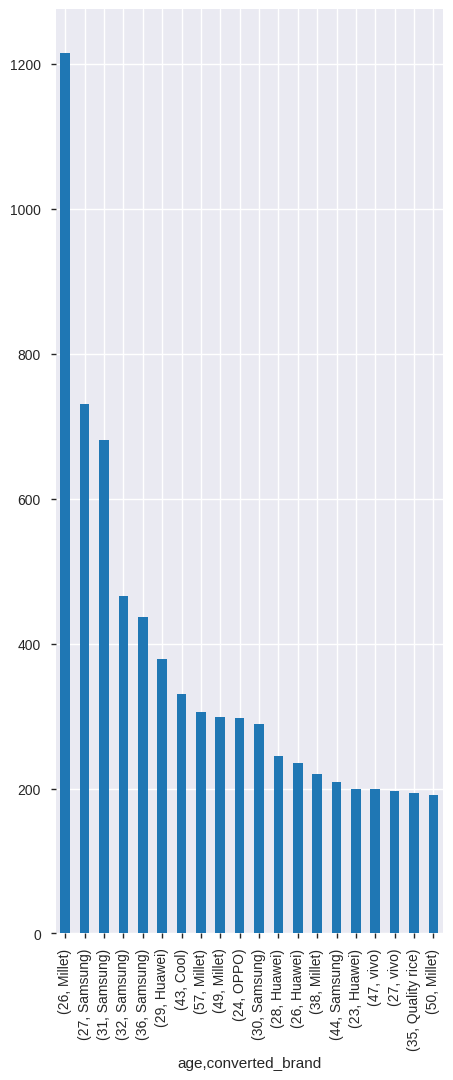

In [431]:
final_set.groupby(['age','converted_brand'])['converted_brand'].count().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(5,12))

In [435]:
pd.pivot_table(final_set,index=["age"],values=["device_id"],
               columns=["converted_brand"],aggfunc=[len],fill_value=0,margins=True)

len                 ...                       
                 device_id                 ...                       
converted_brand Amagatarai Associate CUBE  ...  vivo  亿通          All
age                                        ...                       
10                       0         0    0  ...     0   0    20.000000
14                       0         0    0  ...     4   0     4.000000
16                       0         0    0  ...     0   0     2.000000
18                       0         0    0  ...     7   0     7.000000
19                       0         0    0  ...    61   0    88.000000
20                       0         0    0  ...    20   0   315.000000
21                       0         0    0  ...     0   0   232.000000
22                       0         0    0  ...     7   0   181.000000
23                       0         0    0  ...    56   0   503.000000
24                      92         0    0  ...     1   0   752.000000
25                       0         0    0  ...    18   0   283.000000
26                       0         2    0  ...    26   0  1752.000000
27                       0         0    0  ...   197   0  1147.000000
28                       0         0    8  ...    92   0   717.000000
29                       0         0    0  ...     0   0   611.000000
30                       0         0    0  ...     4   0   500.000000
31                       0         0    0  ...   126  17   909.000000
32                       0         0    0  ...     7   0   725.000000
33                       0         0    0  ...    28   0   395.000000
34                       0         0    0  ...    58   0   270.000000
35                       0         0    0  ...     0   0   546.000000
36                       0         0    0  ...    50   0   664.000000
37                       0         0    0  ...     0   0   245.000000
38                       0         0    0  ...     0   0   249.000000
39                       0         0    0  ...    49   0   118.000000
40                       0         0    0  ...     0   0   173.000000
41                       0         0    0  ...     0   0   221.000000
42                       0         0    0  ...     0   0    78.000000
43                       0         0    0  ...     0   0   502.000000
44                       0         0    0  ...     0   0   323.000000
45                       0         0    0  ...     0   0   131.000000
46                       0         2    0  ...     0   0    10.000000
47                       0         0    0  ...   200   0   264.000000
49                       0         0    0  ...     0   0   363.000000
50                       0         0    0  ...     0   0   356.000000
51                       0         0    0  ...     0   0    47.000000
53                       0         0    0  ...     0   0    61.000000
54                       0         0    0  ...     0   0     2.000000
56                       0         0    0  ...     0   0     1.000000
57                       0         0    0  ...     0   0   369.000000
59                       0         0    0  ...     0   0    27.000000
60                       0         0    0  ...    31   0    31.000000
62                       0         0    0  ...     1   0     1.000000
63                       0         0    0  ...     0   0     3.000000
64                       0         0    0  ...     0   0    10.000000
65                       0         0    0  ...     0   0    55.000000
66                       0         0    0  ...     0   0     3.000000
67                       0         0    0  ...     0   0     5.000000
73                       0         0    0  ...     2   0     2.000000
79                       0         0    0  ...     0   0    17.000000
All                     92         4    8  ...  1045  17 14290.000000

[51 rows x 22 columns]

## EDA on data of 6 states
("MadhyaPradesh","Chhattisgarh", "Uttaranchal", "JammuandKashmir","Goa", "Nagaland")

In [697]:
dfocus_states = pd.merge(device_merge, df_event,how='inner', left_on='device_id', right_on='device_id')
dfocus_states.head()

device_id gender  age  ...  latitude    city          state
0  8765877367300380672      F   32  ... 22.802167  Indore  MadhyaPradesh
1  8765877367300380672      F   32  ... 22.802167  Indore  MadhyaPradesh
2  8765877367300380672      F   32  ... 22.802167  Indore  MadhyaPradesh
3  8765877367300380672      F   32  ... 22.802167  Indore  MadhyaPradesh
4  8765877367300380672      F   32  ... 22.802167  Indore  MadhyaPradesh

[5 rows x 13 columns]

In [698]:
dfocus_states.shape

(2824, 13)

In [699]:
dfocus_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2824 entries, 0 to 2823
Data columns (total 13 columns):
device_id          2824 non-null int64
gender             2824 non-null object
age                2824 non-null int64
age_group          2824 non-null object
brand              2824 non-null object
model              2824 non-null object
converted_brand    2824 non-null object
event_id           2824 non-null float64
timestamp          2824 non-null object
longitude          2824 non-null float64
latitude           2824 non-null float64
city               2824 non-null object
state              2824 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 308.9+ KB


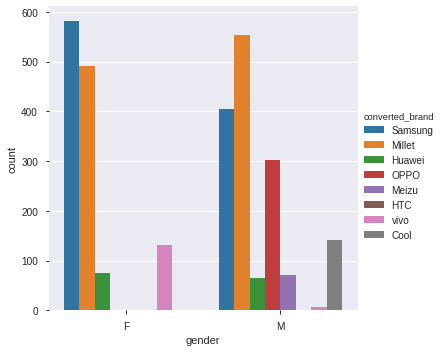

In [453]:
import seaborn as sns 
import matplotlib.pyplot as plt 
  
# Countplot 
sns.catplot(x ="gender", hue ="converted_brand",  
kind ="count", data = dfocus_states) 

In [561]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252497 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     float64
device_id    float64
timestamp    datetime64[ns]
longitude    object
latitude     object
city         object
state        object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 198.5+ MB


In [0]:
myevents = pd.DataFrame(dfocus_states, columns = ['event_id', 'device_id','timestamp','longitude','latitude','state']) 

In [706]:
myevents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2824 entries, 0 to 2823
Data columns (total 6 columns):
event_id     2824 non-null float64
device_id    2824 non-null object
timestamp    2824 non-null datetime64[ns]
longitude    2824 non-null float64
latitude     2824 non-null float64
state        2824 non-null object
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 234.4+ KB


In [0]:
myevents['timestamp'] = pd.to_datetime(myevents['timestamp'], errors='coerce')

In [692]:
myevents.head()

event_id            device_id  ...  latitude          state
0 12768.000000  8765877367300380672  ... 22.802167  MadhyaPradesh
1 59684.000000  8765877367300380672  ... 22.802167  MadhyaPradesh
2 64433.000000  8765877367300380672  ... 22.802167  MadhyaPradesh
3 64719.000000  8765877367300380672  ... 22.802167  MadhyaPradesh
4 70041.000000  8765877367300380672  ... 22.802167  MadhyaPradesh

[5 rows x 6 columns]

In [705]:
myevents["device_id"] = myevents["device_id"].round(1).astype(int)

TypeError: ignored

In [694]:
myevents.query('device_id < 1')

event_id            device_id  ...  latitude          state
466   112073.000000    -3255633678780918  ... 23.605951  MadhyaPradesh
467   143835.000000    -3255633678780918  ... 23.605951  MadhyaPradesh
468   433415.000000    -3255633678780918  ... 23.605951  MadhyaPradesh
469   558134.000000    -3255633678780918  ... 23.605951  MadhyaPradesh
470   613776.000000    -3255633678780918  ... 23.605951  MadhyaPradesh
...             ...                  ...  ...       ...            ...
2819 3049639.000000 -1367859750822199552  ... 22.749997  MadhyaPradesh
2820 3073933.000000 -1367859750822199552  ... 22.749997  MadhyaPradesh
2821 3092956.000000 -1367859750822199552  ... 22.749997  MadhyaPradesh
2822 3166102.000000 -1367859750822199552  ... 22.749997  MadhyaPradesh
2823 3241007.000000 -1367859750822199552  ... 22.749997  MadhyaPradesh

[1358 rows x 6 columns]

In [0]:
from google.colab import files
myevents.to_csv('myevents1054.csv') 
files.download('myevents1054.csv')

In [396]:
dfocus_states.info()   ## 6 states

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2824 entries, 0 to 2823
Data columns (total 13 columns):
device_id          2824 non-null int64
gender             2824 non-null object
age                2824 non-null int64
age_group          2824 non-null object
brand              2824 non-null object
model              2824 non-null object
converted_brand    2824 non-null object
event_id           2824 non-null float64
timestamp          2824 non-null object
longitude          2824 non-null float64
latitude           2824 non-null float64
city               2824 non-null object
state              2824 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 308.9+ KB


In [397]:
dfocus_states.groupby(['state'])['device_id'].count().sort_values(ascending=False)

state
MadhyaPradesh      2633
JammuandKashmir      78
Nagaland             56
Chhattisgarh         50
Goa                   7
Name: device_id, dtype: int64

In [398]:
dfocus_states.groupby(['city'])['device_id'].count().sort_values(ascending=False)

city
Indore         2366
Mandsaur         94
Shivapuri        87
Kathua           65
Kohima           51
Bhilai           35
Hoshangabad      25
Vidisha          21
Bhind            19
Raigarh          13
Anantnag         13
Nimach            7
Panaji            7
Itarsi            5
Dimapur           5
Datia             5
Khargone          4
Korba             1
Chirmiri          1
Name: device_id, dtype: int64

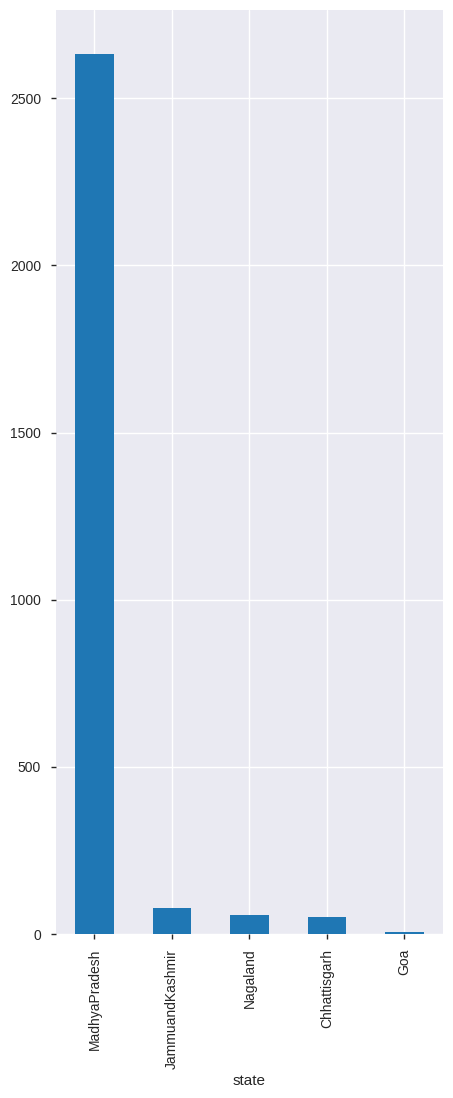

In [399]:
dfocus_states.groupby(['state'])['device_id'].count().sort_values(ascending=False).plot(kind='bar',figsize=(5,12))

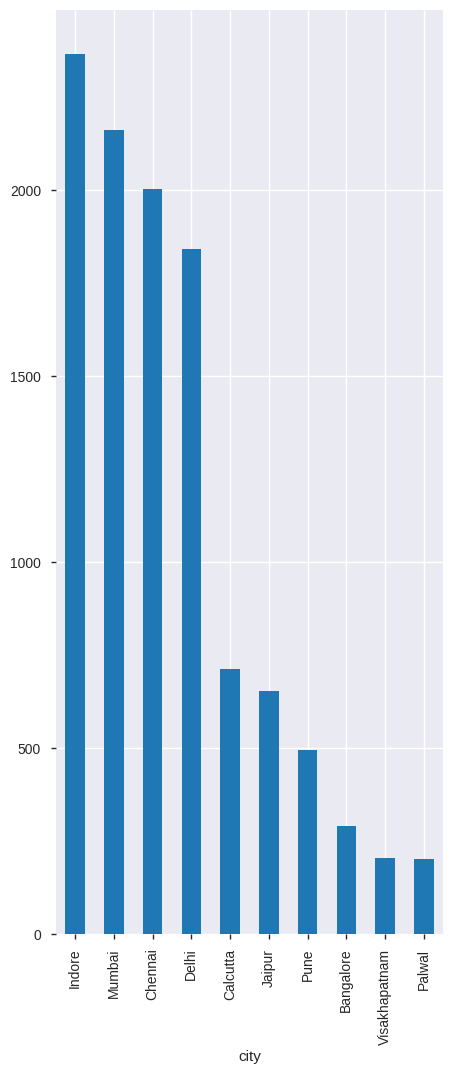

In [400]:
final_set.groupby(['city'])['device_id'].count().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(5,12))

In [0]:
data = [go.Scattergeo(lon=final_set.iloc[final_set['event_id'].sort_values(ascending=False)[:10].index, :]['longitude'], 
                      lat=final_set.iloc[final_set['event_id'].sort_values(ascending=False)[:10].index, :]['latitude'], 
                      text=final_set.iloc[final_set['event_id'].sort_values(ascending=False)[:10].index, :][['state', 'event_id']], 
                      name='',
                      marker=dict(size=final_set.iloc[final_set['event_id'].sort_values(ascending=False)[:10].index, :]['event_id'].count(), 
                                  color='Green'))]
                                  


In [402]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.5.4)


In [0]:
import matplotlib.pyplot as plt

In [404]:
!pip install chart-studio

In [405]:
data

[Scattergeo({
     'lat': array([ 10.997,  26.960,  13.168,  28.685,  19.020,  28.703,  28.715,  28.715,
                    9.552,  27.464]),
     'lon': array([ 76.998,  75.899,  80.360,  77.230,  72.840,  77.297,  77.291,  77.291,
                    78.141,  82.215]),
     'marker': {'color': 'Green', 'size': 10},
     'name': '',
     'text': array([['TamilNadu', 3251690.0],
                    ['Rajasthan', 3251524.0],
                    ['TamilNadu', 3251517.0],
                    ['Delhi', 3251170.0],
                    ['Maharashtra', 3250685.0],
                    ['Delhi', 3250600.0],
                    ['Delhi', 3250526.0],
                    ['Delhi', 3250376.0],
                    ['TamilNadu', 3250285.0],
                    ['UttarPradesh', 3250098.0]], dtype=object)
 })]

In [0]:
layout = go.Layout(title=go.layout.Title(text='State wise plot'), 
                   showlegend=False,
                   geo=dict(scope='asia', projection=go.layout.geo.Projection(type='equirectangular'), showlakes=True,
                            lakecolor='rgb(255, 255, 255)'))

In [0]:
fig = go.Figure(data=data, layout=layout)

In [408]:
fig.show()

In [409]:
iplot(fig)

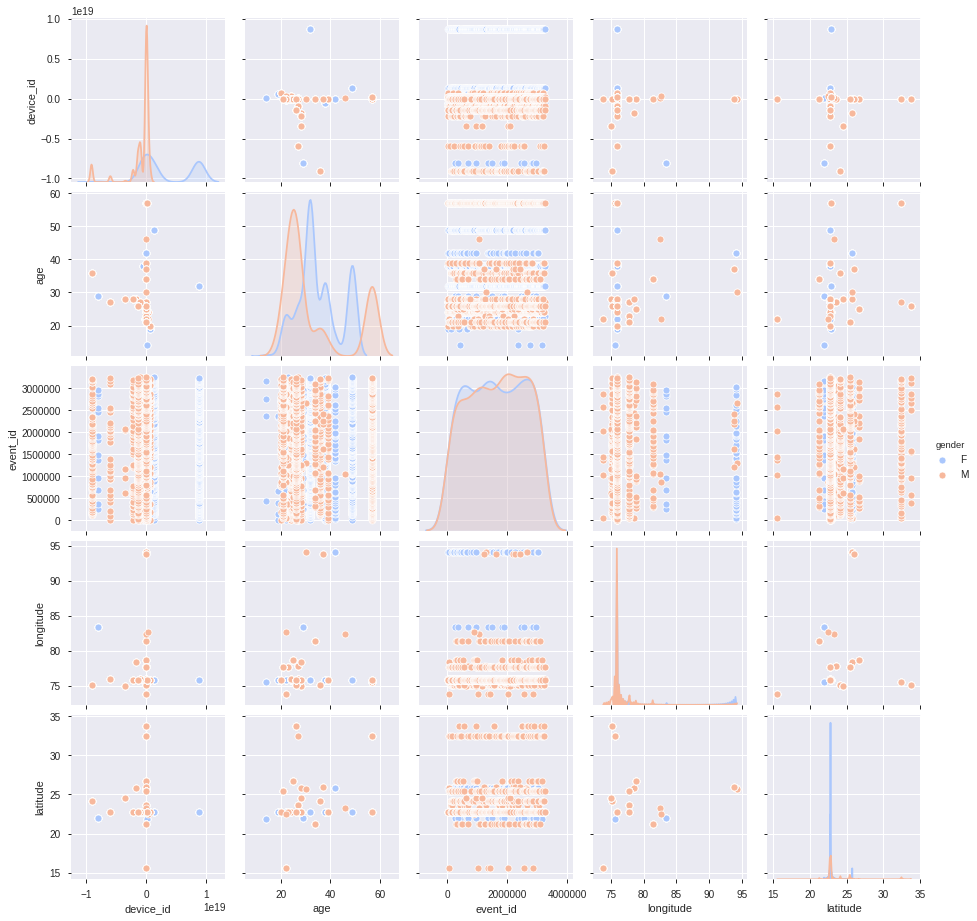

In [455]:
sns.pairplot(dfocus_states, hue ="gender", palette ='coolwarm') 

Observations:
  1. Gender_age_train

     1.1 NULL values not found. Total Records 74645 
     1.2 Age Groups defined are based on Gender and Age. Total 12 age groups (6 + 6)
     1.3 Age Group range for male and female is defined separalty 
     1.4 Male users are more than Female Users (Overall)  
     1.5  
  2. Phone brand

     2.1 NULL values not found. Total records 87726

     2.2 Distinct Models are 1467

     2.3 Distinct Brands are 116

  3. Events

     3.1 Total Records  3252950

     3.2 Few Values found missing. Device_id = 453, Latitude = 423,Longitude=42,         state 377
     3.3 Total State =  32 & Total City = 933

     3.4  Total number of records to analyse as per assigned states are 261097 

     3.5  For our study total 6 states are given and Madhyapradesh has maximum count of cities. Total Cities to study 85

     3.6 After getting data for 6 states under our study we observed that 51 records doesnot have device id.

     3.7 Top 10 states where maximum event recorded
state
Delhi                       751733
Maharashtra                 677105
TamilNadu                   436282
AndhraPradesh               321332
MadhyaPradesh               232690
Rajasthan                   196361
WestBengal                  196161
Karnataka                    99058
UttarPradesh                 94750
Gujarat                      42881

3.8 Minimum event recorded 

Nagaland                      2298

Pondicherry                   1741

Mizoram                       1613

AndamanandNicobarIslands      1515

Meghalaya                     1515

HimachalPradesh               1409

Manipur                        989

Chandigarh                     894

Tripura                        892

ArunachalPradesh               608


3.9  Maximum and minimum events recorded city wise (Top 5 and Bottom 5 )

state          city            
Delhi          Delhi               744212
TamilNadu      Chennai             366828
Maharashtra    Pune                317213
               Mumbai              285246
AndhraPradesh  Visakhapatnam       235725
                                    ...  
               Ramachandrapuram       279
Punjab         Sirhind                269
AndhraPradesh  Tadepallegudem         264
Orissa         Brajrajnagar           263
TamilNadu      Kovilpatti             258

  4. Gender_age_train + Phone_brand

      4.1 Total matching records found 74617
         
5.  All table merge with Device_id
   5.1  Maximum event count in Maharashtra 2835 and Minimum event count in Chandigarh 3.
   5.2 Top 10 states where maximum event recorded

	state

Maharashtra         2835

MadhyaPradesh       2633

TamilNadu           2566

Delhi               1841

WestBengal           879

Rajasthan            796

AndhraPradesh        669

Karnataka            444

UttarPradesh         363

Bihar                281


5.3    City wise maximum and minimum  (TOP 5 and Bottom 5 Cities with states)

State          city       

MadhyaPradesh  Indore         2366

Maharashtra    Mumbai         2160

TamilNadu      Chennai        2004

Delhi          Delhi          1841

WestBengal     Calcutta        713

Chhattisgarh   Korba             1
                Chirmiri          1
               

Karnataka      Hospet            1

TamilNadu      Thuthukkudi       1

Rajasthan      Baran             1 


In [0]:
def generateBaseMap(default_location=[22.762010,75.937988], default_zoom_start=5):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
##75.937988, 22.762010   40.693943, -73.985880  28.704059, 77.102490

In [411]:
base_map= generateBaseMap()
base_map

In [0]:
from folium.plugins import HeatMap

In [0]:
events_copy = dfocus_states.copy()
events_copy['count']= 1
base_map = generateBaseMap()
HeatMap(data=events_copy[['latitude','longitude','count']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(),radius=30, max_zoom=30).add_to(base_map)
base_map.save("myheatmap.html") 



In [0]:
from google.colab import files
files.download("myheatmap.html")

In [415]:
events_copy[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum()

count
latitude  longitude       
15.548266 73.866551      7
21.226964 81.414423     35
21.905980 75.640416      4
21.955042 83.450629     13
22.440439 82.704097      1
22.717193 77.777580      5
22.731945 75.912200    215
22.743242 75.957110    186
22.743920 75.891763     97
22.746819 75.952169     32
22.749997 75.921014    141
22.768653 75.891078     52
22.770707 75.937352    128
22.788127 77.747651     25
22.790444 75.946201    297
22.794318 75.917280    276
22.795340 75.880790     36
22.799558 75.884270     64
22.802167 75.930756    466
22.804291 75.918584      6
22.806684 75.874693    306
22.810867 75.915643     64
23.224663 82.422504      1
23.605951 77.824467     21
24.108457 75.096738     94
24.537876 74.963796      7
25.446868 77.747175     87
25.728123 94.190182      2
25.763434 78.499560      5
25.765812 94.131362     49
25.946122 93.824987      5
26.666756 78.792945     19
32.421466 75.619342      2
32.439865 75.618366     63
33.749656 75.188573     13